I have the following url links and I have downloaded the pdfs in my local. I want to index the content (images/text) of the pdfs in qdrant database. 
https://sustainability.aboutamazon.com/2023-amazon-sustainability-report.pdf\nhttps://arxiv.org/pdf/2405.01814\nhttps://arxiv.org/pdf/2505.06371\nhttps://arxiv.org/pdf/2405.21015\nhttps://arxiv.org/pdf/2206.05229\nhttps://arxiv.org/pdf/2410.06681\nhttps://arxiv.org/pdf/2306.03163\nhttps://arxiv.org/pdf/2504.17674\nhttps://arxiv.org/pdf/2404.14527\nhttps://arxiv.org/pdf/2412.06288\nhttps://arxiv.org/pdf/2505.09598\nhttps://arxiv.org/pdf/2504.06307\nhttps://arxiv.org/pdf/2504.11816\nhttps://arxiv.org/pdf/2309.03852\nhttps://arxiv.org/pdf/2304.03271\nhttps://arxiv.org/pdf/2302.08476\nhttps://arxiv.org/pdf/2311.16863\nhttps://arxiv.org/pdf/2501.16548\nhttps://arxiv.org/pdf/2504.00797\nhttps://arxiv.org/pdf/2506.15572\nhttps://arxiv.org/pdf/2503.05804\nhttps://arxiv.org/pdf/2104.10350\nhttps://arxiv.org/pdf/2501.05899\nhttps://arxiv.org/pdf/2310.03003\nhttps://arxiv.org/pdf/1907.10597\nhttps://arxiv.org/pdf/2404.07413\nhttps://arxiv.org/pdf/2211.06318\nhttps://arxiv.org/pdf/1906.02243\nhttps://arxiv.org/pdf/2111.00364\nhttps://arxiv.org/pdf/2108.06738\nhttps://arxiv.org/pdf/2408.04693\nhttps://arxiv.org/pdf/2508.14170

Also I have metadata of these pdfs stored in metadata.csv. I also want to index along with the content of the pdfs. Eventually I want to build a rag database

How shall I proceed?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great project! Building a RAG database with PDFs and metadata is a powerful way to create a searchable knowledge base. Let me help you break this down into manageable steps.

First, let me understand your current setup better:

1. Do you already have Qdrant installed and running (locally or cloud)?
2. What does your metadata.csv look like? (What columns does it have?)
3. Are you comfortable with Python libraries like `langchain`, `pymupdf`, or `unstructured` for PDF processing?

For the overall approach, we'll need to:
- Extract text and images from PDFs
- Chunk the content appropriately
- Generate embeddings
- Store everything in Qdrant with metadata

Which of these areas would you like to start with, or would you prefer I suggest a specific first step?

1. Yes Qdrant client is installed locally. I would like to use the qdrant database in the cloud.
2. Metadata.csv has the columns  id, type, title, year, citation, url
id is the document id
type is either report or paper. As you can see there are 31 papers and 1 report
title is the title of the report/paper
year is the year when the report/paper was published
url is the url of the report/paper
3. No I am not familiar with any of those libraries

You please suggest a specific first step

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's start with the first step: setting up the basic libraries you'll need.

Since you're not familiar with the PDF processing libraries, I recommend starting with `pymupdf` (also called `fitz`) - it's reliable and handles both text and images well.

Here's what you should install first:

```bash
pip install pymupdf qdrant-client sentence-transformers pandas
```

Once you've installed these, let's take a quick look at your metadata.csv to understand the structure better. Can you run this small code snippet to show us the first few rows?

```python
import pandas as pd
df = pd.read_csv('metadata.csv')
print(df.head())
print(f"Total documents: {len(df)}")
```

This will help us see exactly what we're working with before we start processing the PDFs. Have you installed the libraries and can you show me what the metadata looks like?

In [ ]:
import pandas as pd
df = pd.read_csv('metadata.csv', encoding='latin-1')
df.head(n=2)

FileNotFoundError: [Errno 2] No such file or directory: 'metadata.csv'

In [ ]:
len(df)

32

In [ ]:
!pip install -q PyMuPDF

In [ ]:
!pip install -q qdrant-client

Yes I installed the packages and also executed the code

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! I can see you have 32 documents with good metadata structure. Now let's test if we can read one of your PDF files to make sure everything is working.

Can you try reading one PDF file first? Pick any PDF from your local folder and test this:

```python
import fitz  # PyMuPDF

# Replace 'your_pdf_filename.pdf' with the actual filename
doc = fitz.open('your_pdf_filename.pdf')
print(f"Number of pages: {len(doc)}")
print(f"First page text preview: {doc[0].get_text()[:200]}...")
doc.close()
```

What's the filename of one of your PDFs? Once we confirm we can read the PDFs properly, we'll move to the next step of setting up the Qdrant cloud connection.

Apologies I did not download the pdf

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

No problem! Let's download the PDFs first. We can use Python to download them from the URLs in your metadata.csv.

Here's a simple approach to download one PDF first to test:

```python
import requests

# Let's download the first PDF as a test
url = df.iloc[0]['url']  # Amazon sustainability report
filename = f"{df.iloc[0]['id']}.pdf"

response = requests.get(url)
with open(filename, 'wb') as f:
    f.write(response.content)
    
print(f"Downloaded: {filename}")
```

Try this first to download one PDF. Once we confirm it works, we can download all of them in a loop.

Did this work for you?

In [ ]:
import httpx
import fastcore.all as fc

data_path = fc.Path('watt_bot_data')
data_path.mkdir(exist_ok=True)

url = df.iloc[0]['url']
filename = f"{df.iloc[0]['id']}.pdf"

response = httpx.get(url)
with open(data_path/filename, 'wb') as f: f.write(response.content)



Yes it worked for me

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now let's test reading that PDF to make sure we can extract text from it:

```python
import fitz

with fitz.open(data_path/'amazon2023.pdf') as doc:
    print(f"Number of pages: {len(doc)}")
    print(f"First page text preview:\n{doc[0].get_text()[:300]}...")
```

Once we confirm this works, we can proceed to download all the other PDFs. Does this show you some text from the Amazon report?

In [ ]:
import fitz

with fitz.open(data_path/'amazon2023.pdf') as doc:
    print(f"Number of pages: {len(doc)}")
    print(f"First page text preview:\n{doc[0].get_text()[:300]}...")

Number of pages: 98
First page text preview:
Amazon 
Sustainability 
Report
2023
...


Yes, lets proceed

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now let's download all the remaining PDFs. Here's a simple loop to get them all:

```python
def download_pdf(row):
    filename = f"{row['id']}.pdf"
    if not (data_path/filename).exists():
        response = httpx.get(row['url'])
        with open(data_path/filename, 'wb') as f:
            f.write(response.content)
    
df.apply(download_pdf, axis=1)
```

This will download all 32 PDFs. It might take a few minutes since some are quite large. Should we run this?

In [ ]:
def download_pdf(row):
    filename = f"{row['id']}.pdf"
    if not (data_path/filename).exists():
        response = httpx.get(row['url'].strip())
        with open(data_path/filename, 'wb') as f:
            f.write(response.content)
    
download_status = df.apply(download_pdf, axis=1)


Now what is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now that we have all the PDFs downloaded, the next step is to set up your Qdrant cloud connection. 

Do you already have a Qdrant cloud account and cluster set up? If so, you'll need:
- Your cluster URL
- Your API key

If you don't have a Qdrant cloud setup yet, you can create a free account at https://cloud.qdrant.io/

Once you have those credentials, we can test the connection. Do you have your Qdrant cloud credentials ready?

Yes I have set the API key as QDRANT_API_KEY and the cluster URL is https://76eb75ff-5ca3-4a68-93d4-ae19a9c169a4.us-west-2-0.aws.cloud.qdrant.io

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's test the connection to your Qdrant cloud cluster:

```python
import os
from qdrant_client import QdrantClient

client = QdrantClient(
    url="https://76eb75ff-5ca3-4a68-93d4-ae19a9c169a4.us-west-2-0.aws.cloud.qdrant.io",
    api_key=os.getenv("QDRANT_API_KEY")
)

# Test the connection
print(client.get_collections())
```

This will show us any existing collections in your cluster. Can you run this to confirm the connection works?

In [ ]:
import os
from qdrant_client import QdrantClient

QDRANT_HOST = "https://76eb75ff-5ca3-4a68-93d4-ae19a9c169a4.us-west-2-0.aws.cloud.qdrant.io:6333"

client = QdrantClient(url=QDRANT_HOST, api_key=os.getenv("QDRANT_API_KEY"))

# Test the connection
print(client.get_collections())

collections=[CollectionDescription(name='wattbot_documents_768'), CollectionDescription(name='wattbot_documents')]


Yes the connection works

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! The connection is working and your cluster is empty (no collections yet), which is perfect for starting fresh.

Now we need to decide on our approach for processing the PDFs. We have a few key decisions to make:

1. **Chunking strategy**: How should we split the PDF content? (by page, by paragraph, fixed size chunks, etc.)
2. **Embedding model**: What model should we use to create vector embeddings?
3. **Collection structure**: Should we have one collection for all documents, or separate collections for papers vs reports?

What's your preference for the chunking approach? Do you want to keep content organized by pages, or break it into smaller semantic chunks?

Which is favorable?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

For a RAG system, smaller semantic chunks are generally more favorable because:

1. **Better retrieval accuracy** - You can find the exact relevant section rather than a whole page
2. **More focused context** - Each chunk contains related information that fits together
3. **Better embedding quality** - Smaller, coherent chunks create more meaningful vector representations

I'd recommend chunks of around 500-1000 characters with some overlap between chunks to avoid cutting sentences in half.

For the embedding model, we have options like:
- `sentence-transformers/all-MiniLM-L6-v2` (lightweight, good for general use)
- `sentence-transformers/all-mpnet-base-v2` (higher quality, larger)

Which embedding model would you prefer to start with - the lighter/faster one or the higher quality one?

In [ ]:
!du -sh watt_bot_data

66M	watt_bot_data


I have the pdfs of size 65 MB. In qdrant cloud I have the disk space of 4GB and RAM of 1GB. Is the qdrant cloud size enough?
Lets use the lightweight embedding model

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, your Qdrant cloud resources should be sufficient! Here's a rough estimate:

- 65MB of PDFs will likely extract to ~10-20MB of text
- With 500-1000 character chunks, you'll have roughly 20,000-40,000 chunks
- Using the lightweight model (384 dimensions), each vector is ~1.5KB
- Total storage needed: ~60-100MB for vectors + metadata

This fits comfortably in your 4GB disk space and 1GB RAM.

Let's install the lightweight embedding model:

```python
!pip install sentence-transformers
```

Once that's installed, should we start processing one PDF first to test our pipeline before doing all 32?

What about the images in the PDF?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great question! Images in PDFs can contain valuable information like charts, graphs, and diagrams that are important for a comprehensive RAG system.

For handling images, we have a few options:

1. **Extract and describe images** - Use vision models (like CLIP or BLIP) to generate text descriptions of images
2. **OCR for text in images** - Extract any text embedded in charts/diagrams 
3. **Skip images for now** - Focus on text-only initially, add image processing later

Given your cloud resources and that this is your first RAG system, which approach interests you most? Would you like to start with text-only and add image processing later, or tackle images from the beginning?

In [ ]:
!pip install -q sentence-transformers

Lets do with text

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's focus on text extraction and processing first.

Now let's create our first collection in Qdrant and set up the embedding model. We'll need to:

1. Initialize the embedding model
2. Create a collection with the right vector dimensions
3. Test with one PDF first

Let's start by initializing the embedding model:

```python
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
print(f"Model loaded. Vector dimension: {model.get_sentence_embedding_dimension()}")
```

Can you run this to load the model?

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
model.get_sentence_embedding_dimension()

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

I ran the model. Now next what

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! The model is loaded and creates 384-dimensional vectors. Now let's create a collection in Qdrant to store our document chunks.

```python
from qdrant_client.models import Distance, VectorParams

collection_name = "wattbot_documents"

client.create_collection(
    collection_name=collection_name,
    vectors_config=VectorParams(size=384, distance=Distance.COSINE)
)

print(f"Collection '{collection_name}' created successfully!")
```

This creates a collection that can store our 384-dimensional vectors with cosine similarity for search. Should we run this?

In [ ]:
from qdrant_client.models import Distance, VectorParams

collection_name = "wattbot_documents"

if not client.collection_exists(collection_name):
    client.create_collection(collection_name=collection_name, vectors_config=VectorParams(size=384, distance=Distance.COSINE))

Okay what is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! The collection is created successfully. Now let's process one PDF to test our pipeline. We need to:

1. Extract text from a PDF
2. Split it into chunks
3. Create embeddings and store them in Qdrant

Let's start by extracting and chunking text from the Amazon report:

```python
import contextkit.read as rd
# Test with one PDF
text = rd.read_pdf(data_path/'amazon2023.pdf')
print(f"Extracted {len(text)} characters")
print(f"First 200 chars: {text[:200]}")
```

Should we run this to see how much text we extract?

In [ ]:
import contextkit.read as rd
# Test with one PDF
text = rd.read_pdf(data_path/'amazon2023.pdf')
print(f"Extracted {len(text)} characters")
print(f"First 200 chars: {text[:200]}")

Extracted 450063 characters
First 200 chars: Amazon 
Sustainability 
Report
2023 Contents
Overview
3 Introduction
4 A Letter from Our Chief 
Sustainability Officer 
5 How We Work
6 Goals Summary
7 2023 Year in Review  
Environment
9 Carbon
24 Ca


Okay now what is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! We extracted 450,063 characters from the Amazon report. Now we need to split this into smaller chunks for better retrieval.

Let's create chunks of around 800 characters with some overlap:

```python
def create_chunks(text, chunk_size=800, overlap=100):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunk = text[start:end]
        chunks.append(chunk)
        start = end - overlap
    return chunks

chunks = create_chunks(text)
print(f"Created {len(chunks)} chunks")
print(f"First chunk: {chunks[0][:100]}...")
```

Should we run this to see how many chunks we get?

Why do we need overlap? Can we use the fastcore chunked function https://fastcore.fast.ai/basics.html#chunked?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great questions! 

**Why overlap?** When we split text at fixed positions, we might cut sentences or paragraphs in the middle. Overlap helps ensure that complete thoughts/concepts appear in at least one chunk, improving retrieval quality.

**Using fastcore.chunked:** Yes, we can use `fc.chunked`! However, it splits by number of items (characters), not by semantic boundaries. Let's try it:

```python
chunks = list(fc.chunked(text, 800))
print(f"Created {len(chunks)} chunks")
print(f"First chunk length: {len(chunks[0])}")
```

Would you like to try this simpler approach first, or should we implement overlap for better semantic chunking?

Is there a name for this chunking?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! There are several names for different chunking strategies:

1. **Fixed-size chunking** - What `fc.chunked` does (split by character/token count)
2. **Overlapping chunking** - Fixed-size with overlap between chunks
3. **Semantic chunking** - Split by sentences, paragraphs, or meaning
4. **Recursive chunking** - Try sentences first, then paragraphs, then fixed-size as fallback

The overlap approach is often called **"sliding window chunking"** because each chunk "slides" over the previous one.

Which approach sounds most appealing to you for your RAG system?

Is there a way to use islice?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! `itertools.islice` can be great for creating overlapping chunks efficiently. You can use it to create a sliding window pattern:

```python
from itertools import islice

def sliding_window_chunks(text, chunk_size=800, step=700):
    for i in range(0, len(text), step):
        yield text[i:i+chunk_size]
```

This creates chunks of 800 characters with 100 character overlap (800-700=100). The `islice` approach would be more memory-efficient for very large texts.

Would you like to try this sliding window approach, or do you prefer the simpler fixed-size chunking for now?

But the above one is not using islice


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're absolutely right! That example doesn't use `islice` at all. Here's how you could actually use `islice` for chunking:

```python
from itertools import islice

def islice_chunks(text, chunk_size=800):
    it = iter(text)
    while chunk := ''.join(islice(it, chunk_size)):
        yield chunk
```

This uses `islice` to take `chunk_size` characters at a time from the text iterator.

Would you like to try this `islice` approach, or would you prefer to stick with a simpler method for now?

In [ ]:
from itertools import islice

def sliding_window_chunks(text, chunk_size=800, step=700):
    for i in range(0, len(text), step):
        yield text[i:i+chunk_size]

In [ ]:
chunks = list(sliding_window_chunks(text))
len(chunks), chunks[0][:100]

(643,
 'Amazon \nSustainability \nReport\n2023 Contents\nOverview\n3 Introduction\n4 A Letter from Our Chief \nSust')

What is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! You've created 643 chunks from the Amazon report. Now let's create embeddings for these chunks and store them in Qdrant.

Let's start with just the first few chunks to test:

```python
# Test with first 3 chunks
test_chunks = chunks[:3]
embeddings = model.encode(test_chunks)
print(f"Created embeddings shape: {embeddings.shape}")
```

Should we run this to see if the embedding generation works?

In [ ]:
# Test with first 3 chunks
test_chunks = chunks[:3]
embeddings = model.encode(test_chunks)
embeddings.shape

(3, 384)

Yes that is working

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! The embeddings are working perfectly - 3 chunks with 384-dimensional vectors each.

Now let's store these test chunks in Qdrant with their metadata. We need to create points with:
- Vectors (embeddings)
- Payload (metadata like document ID, chunk text, etc.)

```python
from qdrant_client.models import PointStruct

points = [
    PointStruct(
        id=i,
        vector=embeddings[i].tolist(),
        payload={"text": chunk, "doc_id": "amazon2023", "chunk_id": i}
    )
    for i, chunk in enumerate(test_chunks)
]
```

Should we create these points and upload them to test the storage?

Would not be storing the metadata information like type, title, year, citation and url?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Absolutely! You're right - we should include all the metadata from your CSV file. Let me modify the payload to include that information:

```python
# Get metadata for amazon2023 document
doc_metadata = df[df['id'] == 'amazon2023'].iloc[0]

points = [
    PointStruct(
        id=i,
        vector=embeddings[i].tolist(),
        payload={
            "text": chunk, 
            "doc_id": "amazon2023", 
            "chunk_id": i,
            "type": doc_metadata['type'],
            "title": doc_metadata['title'],
            "year": doc_metadata['year'],
            "citation": doc_metadata['citation'],
            "url": doc_metadata['url']
        }
    )
    for i, chunk in enumerate(test_chunks)
]
```

Should we create these points with the full metadata?

In [ ]:
# Get metadata for amazon2023 document
from qdrant_client.models import PointStruct
def create_payload(index, chunk, doc_id):
    r = df[df['id'] == doc_id].iloc[0]
    return {"text": chunk, "doc_id": doc_id, "chunk_id": index, "type": r['type'], "title": r['title'], "year": int(r['year']), "citation": r['citation'], "url": r['url']}


points = [
    PointStruct(id=i, vector=model.encode(chunk).tolist(), payload=create_payload(i, chunk, 'amazon2023')) for i, chunk in enumerate(test_chunks)
]

# Upload to Qdrant
client.upsert(collection_name=collection_name, points=points)
print(f"Uploaded {len(points)} points to Qdrant!")

Uploaded 3 points to Qdrant!


Does the upsert replaces the existing points or create duplicates?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great question! `upsert` will **replace** existing points if they have the same ID, not create duplicates. 

Since we're using sequential IDs (0, 1, 2...), if you run the same code again, it will overwrite those 3 points rather than create new ones.

For processing all documents, we'll need unique IDs across all chunks. Should we modify the ID strategy to avoid conflicts when we process multiple documents?

Not needed for now. What is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now let's test if our search functionality works. We can query the collection to see if we get relevant results back:

```python
# Test search
query = "sustainability goals"
query_vector = model.encode(query).tolist()
results = client.search(collection_name=collection_name, query_vector=query_vector, limit=2)
```

Should we run this to see if the search returns relevant chunks from the Amazon report?

In [ ]:
# Test search
query = "sustainability goals"
query_vector = model.encode(query).tolist()
results = client.search(collection_name=collection_name, query_vector=query_vector, limit=2)
results[0]

/tmp/ipykernel_55/96134313.py:4: DeprecationWarning: `search` method is deprecated and will be removed in the future. Use `query_points` instead.
  results = client.search(collection_name=collection_name, query_vector=query_vector, limit=2)


ScoredPoint(id=2, version=20, score=0.5657909, payload={'text': 'ios, and Ring.\nOur 2023 Sustainability Report is structured into three \nmain categories: Environment, Value Chain, and People. In \nthe Environment\xa0  section, we discuss scaling our work, \npartnering with others, and inventing new solutions to \nminimize our emissions, waste, and water use; increasing \nour use of carbon-free energy; and pioneering solutions to \nimprove packaging, products, and the materials we use. In \nthe Value Chain\xa0  section, we discuss our commitment to \nrespect the human rights of people connected to our global \nbusiness, managing a responsible supply chain, creating \nsustainable products and using more sustainable materials, \nadvancing supplier diversity, and having a positive impact on \nthe communities where we operate. In the People\xa0  section, \nwe discuss our ambitio', 'doc_id': 'amazon2023', 'chunk_id': 2, 'type': 'report', 'title': '2023 Amazon Sustainability Report', 'year'

Ok so what is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! The search is working (though we should use `query_points` instead of the deprecated `search` method).

Now that our pipeline works for one document, we have two options:

1. **Scale up**: Process all 32 PDFs and store everything in Qdrant
2. **Build query interface**: Create a simple function to search and retrieve relevant chunks

Which would you like to tackle first - processing all your documents, or creating a better search interface?

Lets use the query_points and scale up

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great choice! Let's first update to use `query_points` and then scale up.

Here's the updated search method:

```python
from qdrant_client.models import Query

results = client.query_points(collection_name=collection_name,  query=query_vector, limit=2)
print(results.points[0].payload['text'][:100])
```

Should we test this updated search method first, then move on to processing all 32 PDFs?

In [ ]:
from qdrant_client.models import Query

results = client.query_points(collection_name=collection_name,  query=query_vector, limit=2)
print(results.points[0].payload['text'][:100])

ios, and Ring.
Our 2023 Sustainability Report is structured into three 
main categories: Environment


Lets scale up

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now let's scale up to process all 32 PDFs. We need to create a function that processes each document and generates unique IDs.

Here's the approach - should I write the full processing function for you, or would you prefer to build it step by step?

The function would:
1. Loop through each row in your metadata CSV
2. Extract text from each PDF
3. Create chunks with unique IDs
4. Generate embeddings and store in Qdrant

What's your preference?

In [ ]:
def create_point(idx, chunk, doc_id):
    return PointStruct(id=f'{doc_id}_{idx}', vector=model.encode(chunk).tolist(), payload=create_payload(id, chunk, doc_id))

def create_points(doc_id):
    text = rd.read_pdf(data_path/f"{doc_id}.pdf")
    return fc.L([create_point(i, chunk, doc_id) for i, chunk in enumerate(sliding_window_chunks(text))])

all_ids = fc.L(df['id'].tolist())
print(all_ids[:2])
# all_points = fc.parallel(create_points, all_ids, threadpool=True)
# len(all_points.flatten())





['amazon2023', 'chen2024']


Each text extraction and chunking will take lot of time. How shall we optimize it?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good thinking about optimization! You've already set up parallel processing with `fc.parallel` which is great. Here are a few optimization strategies:

1. **Batch processing**: Process embeddings in batches instead of one-by-one
2. **Async processing**: Use async operations for I/O
3. **Caching**: Save processed chunks to disk to avoid reprocessing

Since you're using `threadpool=True`, that should help with the PDF reading. For embeddings, you could batch them:

```python
# Instead of encoding each chunk individually
embeddings = model.encode([chunk for chunk in chunks])  # Batch encode
```

Which optimization interests you most - batching the embeddings or adding progress tracking first?

Batching the embedding

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great choice! Batching embeddings will be much faster than encoding one chunk at a time.

Here's how to modify your `create_point` function to work with batched embeddings:

```python
def create_points_batched(doc_id):
    text = rd.read_pdf(data_path/f"{doc_id}.pdf")
    chunks = list(sliding_window_chunks(text))
    embs = model.encode(chunks)  # Batch encode all chunks at once
    
    return [PointStruct(id=f'{doc_id}_{i}', vector=embs[i].tolist(), payload=create_payload(i, chunk, doc_id)) for i, chunk in enumerate(chunks)]
```

Should we test this with one document first to see the speed improvement?

In [ ]:
def create_points_batched(doc_id):
    text = rd.read_pdf(data_path/f"{doc_id}.pdf")
    chunks = list(sliding_window_chunks(text))
    embs = model.encode(chunks)  # Batch encode all chunks at once
    
    return fc.L([PointStruct(id=f'{doc_id}_{i}', vector=embs[i].tolist(), payload=create_payload(i, chunk, doc_id)) for i, chunk in enumerate(chunks)])

In [ ]:
text[:10]

'Amazon \nSu'

Is there any faster way to embed? The function create_points_batched is taking too much time as there are too many chunks

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! Here are several ways to speed up embedding:

1. **Smaller batch sizes**: Instead of encoding all chunks at once, process in smaller batches (e.g., 32-64 chunks)
2. **GPU acceleration**: If available, the model will automatically use GPU
3. **Faster model**: Use an even lighter model like `all-MiniLM-L12-v2`
4. **Larger chunks**: Reduce the number of chunks by using bigger chunk sizes

How many chunks are you getting per document? You could try processing chunks in batches of 50:

```python
# Process embeddings in batches of 50
for i in range(0, len(chunks), 50):
    batch = chunks[i:i+50]
    batch_embs = model.encode(batch)
```

Which approach would you like to try first?

In [ ]:
chunks = list(sliding_window_chunks(text))
len(chunks)

643

There are 643 chunks. Is it too many?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

643 chunks is quite a lot for one document! That's why the embedding is taking so long. Here are a few options to reduce this:

1. **Larger chunks**: Increase chunk_size from 800 to 1500-2000 characters
2. **Larger step size**: Reduce overlap by increasing step from 700 to closer to chunk_size
3. **Batch processing**: Process in smaller batches of 32-64 chunks

For comparison, with 1500 character chunks and 1400 step (100 overlap), you'd get roughly ~320 chunks instead of 643.

Which approach would you prefer to try first?

Is there any cons for using larger chunks?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, there are some trade-offs with larger chunks:

**Cons of larger chunks:**
1. **Less precise retrieval** - You might get a whole section when you only need one paragraph
2. **Mixed topics** - Larger chunks may contain multiple unrelated concepts, making embeddings less focused
3. **Context window limits** - Some LLMs have token limits, so very large chunks might get truncated

**Pros:**
1. **Fewer total chunks** - Faster processing and storage
2. **More context** - Each chunk contains more complete information
3. **Better for complex topics** - Full explanations stay together

For your RAG system, would you prefer more precise retrieval (smaller chunks) or faster processing (larger chunks)?

What is the tokeni limits of our embedding model?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The `all-MiniLM-L6-v2` model has a **maximum sequence length of 512 tokens**. 

Since 1 token ≈ 4 characters on average, this means roughly **2000 characters maximum** per chunk.

Your current chunks of 800 characters are well within this limit (~200 tokens), so you have room to increase chunk size if you want fewer chunks without hitting the model's limit.

Would you like to try increasing to 1500 characters to reduce the number of chunks?

What should I keep the step size?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

For 1500 character chunks, you have a few good options for step size:

1. **No overlap (step = 1500)**: Fastest processing, no redundancy
2. **Small overlap (step = 1400)**: 100 characters overlap, ensures sentences don't get cut
3. **Medium overlap (step = 1300)**: 200 characters overlap, better context preservation

I'd recommend **step = 1400** as a good balance - you'll get about half as many chunks (~320 instead of 643) while keeping some overlap for better retrieval quality.

What do you think? Would you like to try this configuration?

Why does overlap gives better retrieval quality?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great question! Overlap improves retrieval quality because:

1. **Prevents information fragmentation** - If a key concept spans across a chunk boundary, overlap ensures it appears completely in at least one chunk

2. **Context preservation** - Important sentences that reference previous information won't lose that context when chunks are split

3. **Better semantic matching** - When a user asks a question, the relevant answer is more likely to be found in a complete, coherent chunk rather than a fragment

For example, without overlap:
- Chunk 1: "...the company's carbon reduction strategy involves..."
- Chunk 2: "...renewable energy adoption and efficiency measures."

With overlap, one chunk would contain the complete thought about carbon reduction strategy.

Does this make sense? Would you like to try the 1500/1400 configuration?

In [ ]:
!pip install -q more_itertools

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
from more_itertools import ilen

def get_chunks_count(doc_id):
    text = rd.read_pdf(data_path/f"{doc_id}.pdf")
    return ilen(sliding_window_chunks(text, chunk_size=1500, step=1400))

In [ ]:
chunks_count = all_ids.map(get_chunks_count)

How to generate bar plot?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can create a bar plot using matplotlib! Here's a simple approach:

```python
import matplotlib.pyplot as plt

plt.bar(range(len(chunks_count)), chunks_count)
plt.xlabel('Document Index')
plt.ylabel('Number of Chunks')
plt.title('Chunks per Document')
plt.show()
```

Would you like to try this, or do you want to customize it further (like adding document names on x-axis)?

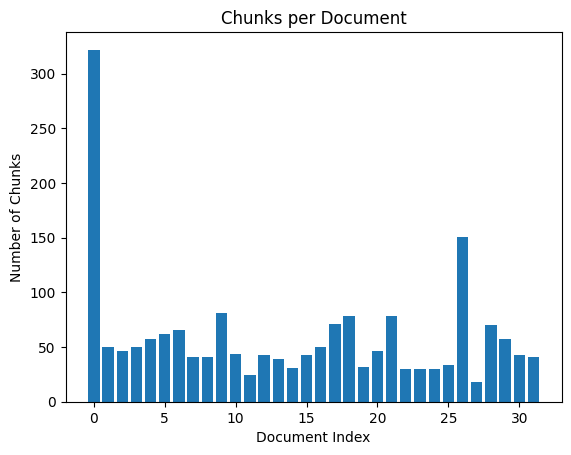

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(len(chunks_count)), chunks_count)
plt.xlabel('Document Index')
plt.ylabel('Number of Chunks')
plt.title('Chunks per Document')
plt.show()

In [ ]:
def create_points_batched(doc_id):
    text = rd.read_pdf(data_path/f"{doc_id}.pdf")
    chunks = list(sliding_window_chunks(text, chunk_size=1500, step=1400))
    embs = model.encode(chunks)  # Batch encode all chunks at once
    
    return fc.L([PointStruct(id=f'{doc_id}_{i}', vector=embs[i].tolist(), payload=create_payload(i, chunk, doc_id)) for i, chunk in enumerate(chunks)])

Generating the embedding is taking lot of time locally. Can we generate the embedding from fireworks.ai?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! Using Fireworks.ai for embeddings could be much faster than local processing. You'd need to:

1. Install the Fireworks client: `pip install fireworks-ai`
2. Set up your Fireworks API key
3. Use their embedding API instead of the local model

However, there are trade-offs:
- **Pros**: Much faster, no local compute needed
- **Cons**: API costs, need internet connection, data sent to external service

Do you have a Fireworks.ai account and API key? And are you comfortable with sending your PDF content to their API for embedding generation?

In [ ]:
!pip install -q fireworks-ai

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Yes I have the fireworks account and I am sending PDF content to their API for embedding generation

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now you need to set up the Fireworks client. You'll need to:

1. Set your Fireworks API key as an environment variable
2. Replace the local embedding model with Fireworks API calls

Do you have your Fireworks API key ready to set as an environment variable?

I have already set the environment variable; let's get started. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's set up the Fireworks client and test it with a small batch first:

```python
import fireworks.client
fireworks.client.api_key = os.getenv("FIREWORKS_API_KEY")
```

Which Fireworks embedding model would you like to use? They have several options like `nomic-ai/nomic-embed-text-v1.5` or others. Do you have a preference?

I want to go for a sweet spot between accuracy and speed. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

For a good balance between accuracy and speed, I'd recommend `nomic-ai/nomic-embed-text-v1.5`. It's fast, cost-effective, and performs well for retrieval tasks.

Let's test it with a few chunks first:

```python
import fireworks.client
fireworks.client.api_key = os.getenv("FIREWORKS_API_KEY")

# Test with a few chunks
test_response = fireworks.client.Embedding.create(
    model="nomic-ai/nomic-embed-text-v1.5",
    input=chunks[:3]
)
```

Should we try this to see if the API connection works?

In [ ]:
import fireworks.client
fireworks.client.api_key = os.getenv("FIREWORKS_API_KEY")

# Test with a few chunks
test_response = fireworks.client.Embedding.create(
    model="nomic-ai/nomic-embed-text-v1.5",
    input=chunks[:3]
)

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


How to resolve the error? I got the embedding

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That error is just a warning about an unclosed session - it doesn't affect the functionality. Your embeddings were created successfully!

Let's check the response structure:

```python
print(f"Number of embeddings: {len(test_response.data)}")
print(f"Embedding dimension: {len(test_response.data[0].embedding)}")
```

Should we test this to see the embedding dimensions?

In [ ]:
len(test_response.data)

3

In [ ]:
len(test_response.data[0].embedding)

768

I think we might need to update the collection's vector size

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Exactly right! The Fireworks model creates 768-dimensional vectors, but your Qdrant collection is configured for 384 dimensions.

You have two options:
1. **Create a new collection** with 768 dimensions
2. **Recreate the existing collection** (this will delete the 3 test points)

Which would you prefer?

Lets create a new collection

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's create a new collection with 768 dimensions for the Fireworks embeddings:

```python
new_collection_name = "wattbot_documents_768"

client.create_collection(
    collection_name=new_collection_name,
    vectors_config=VectorParams(size=768, distance=Distance.COSINE)
)
```

Should we create this new collection?

In [ ]:
new_collection_name = "wattbot_documents_768"

if not client.collection_exists(new_collection_name):
    client.create_collection(collection_name=new_collection_name, vectors_config=VectorParams(size=768, distance=Distance.COSINE))

So what is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now we need to update your `create_points_batched` function to use the Fireworks API instead of the local model:

```python
def create_points_fireworks(doc_id):
    text = rd.read_pdf(data_path/f"{doc_id}.pdf")
    chunks = list(sliding_window_chunks(text, chunk_size=1500, step=1400))
    
    # Use Fireworks API for embeddings
    response = fireworks.client.Embedding.create(
        model="nomic-ai/nomic-embed-text-v1.5",
        input=chunks
    )
    
    return fc.L([PointStruct(id=f'{doc_id}_{i}', vector=response.data[i].embedding, payload=create_payload(i, chunk, doc_id)) for i, chunk in enumerate(chunks)])
```

Should we test this with one document first?

In [ ]:
def create_points_fireworks(doc_id):
    text = rd.read_pdf(data_path/f"{doc_id}.pdf")
    chunks = list(sliding_window_chunks(text, chunk_size=1500, step=1400))
    
    # Use Fireworks API for embeddings
    response = fireworks.client.Embedding.create(model="nomic-ai/nomic-embed-text-v1.5", input=chunks)
    
    return fc.L([PointStruct(id=f'{doc_id}_{i}', vector=response.data[i].embedding, payload=create_payload(i, chunk, doc_id)) for i, chunk in enumerate(chunks)])


In [ ]:
doc_id = all_ids[0]; doc_id


'amazon2023'

In [ ]:
text = rd.read_pdf(data_path/f"{doc_id}.pdf")
chunks = list(sliding_window_chunks(text, chunk_size=1500, step=1400))

In [ ]:
len(chunks)

322

In [ ]:
chunks[0]

'Amazon \nSustainability \nReport\n2023 Contents\nOverview\n3 Introduction\n4 A Letter from Our Chief \nSustainability Officer\xa0\n5 How We Work\n6 Goals Summary\n7 2023 Year in Review \xa0\nEnvironment\n9 Carbon\n24 Carbon-Free Energy\n29 Packaging \n34 Waste and Circularity\n40 Water\nValue Chain\n45 Human Rights \n50 Responsible Supply Chain\n58 Sustainable Products and \nMaterials \n64 Supplier Diversity \n67 Community Impact\nPeople\n75 Employee Experience\n81 Health and Safety\n86 Inclusive Experiences\nAppendix\n94  Sustainability Reporting Topic \nAssessment\n95  Endnotes\n96 Assurance Statements \n97 Disclaimer and Forward-Looking \nStatements \nOn the cover  \nThe Baldy Mesa Solar and Storage Project (developed \nand operated by AES), located in Adelanto, California. Employees inside one of our newest office buildings in Bellevue, \nWashington.\nIntroduction 2023 Year in ReviewGoals SummaryHow We WorkCSO Letter\nAbout This Report\nThis is our sixth annual report detailing pr

How to resolve the error?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The error suggests the request is too large - 322 chunks might exceed Fireworks' API limits. Let's try processing in smaller batches:

```python
def create_embeddings_batch(chunks, model="nomic-ai/nomic-embed-text-v1.5", bs=50):
    embeddings = fc.L()
    for batch in fc.chunked(chunks, chunk_sz=bs):
        response = fireworks.client.Embedding.create(model=model, input=batch)
        embeddings.extend([data.embedding for data in response.data])
    return embeddings
```

Should we try this batched approach?

In [ ]:
def create_embeddings_batch(chunks, model="nomic-ai/nomic-embed-text-v1.5", bs=50):
    embeddings = fc.L()
    for batch in fc.chunked(chunks, chunk_sz=bs):
        response = fireworks.client.Embedding.create(model=model, input=batch)
        embeddings.extend([data.embedding for data in response.data])
    return embeddings

In [ ]:
emb = create_embeddings_batch(chunks)
len(emb), len(emb[0])

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


(322, 768)

And now how shall we modify the create_points_fireworks function. 


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Now let's update the `create_points_fireworks` function to use the batched embedding approach:

```python
def create_points_fireworks(doc_id):
    text = rd.read_pdf(data_path/f"{doc_id}.pdf")
    chunks = list(sliding_window_chunks(text, chunk_size=1500, step=1400))
    embeddings = create_embeddings_batch(chunks)
    
    return fc.L([PointStruct(id=f'{doc_id}_{i}', vector=embeddings[i], payload=create_payload(i, chunk, doc_id)) for i, chunk in enumerate(chunks)])
```

Should we test this updated function with one document?

In [ ]:
def create_points_fireworks(doc_id):
    text = rd.read_pdf(data_path/f"{doc_id}.pdf")
    chunks = list(sliding_window_chunks(text, chunk_size=1500, step=1400))
    embeddings = create_embeddings_batch(chunks)
    
    return fc.L([PointStruct(id=f'{doc_id}_{i}', vector=embeddings[i], payload=create_payload(i, chunk, doc_id)) for i, chunk in enumerate(chunks)])

For all the ids it is taking lot of time. Is there a way to slow the process?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! There are several ways to make the process more manageable:

1. **Process fewer documents at a time** - Start with just 5-10 documents
2. **Add progress tracking** - See which document is being processed
3. **Save progress** - Store completed documents so you can resume if interrupted

Which approach would you prefer to try first?

Lets do 10 documetns at a time and concatenate those results

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! Let's process 10 documents at a time. Here's how we can do it:

```python
# Process first 10 documents
batch_1_ids = all_ids[:10]
batch_1_points = fc.parallel(create_points_fireworks, batch_1_ids, threadpool=True)
all_points_batch1 = batch_1_points.flatten()
```

Should we try this with the first batch of 10 documents?

In [ ]:
batch_ids = fc.L(fc.chunked(all_ids, n_chunks=3))
batch_ids.map(len)

(#3) [11,11,10]

In [ ]:
first_batch_points = fc.parallel(create_points_fireworks, batch_ids[0], threadpool=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
len(first_batch_points)

11

In [ ]:
second_batch_points = fc.parallel(create_points_fireworks, batch_ids[1], threadpool=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
len(second_batch_points)

11

In [ ]:
third_batch_points = fc.parallel(create_points_fireworks, batch_ids[2], threadpool=True)
len(third_batch_points)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


10

In [ ]:
all_points = fc.L(first_batch_points.concat(), second_batch_points.concat(), third_batch_points.concat()).concat()

In [ ]:
len(all_points)

1899

Now how shall I upate to collection?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! You have 1,899 points ready to upload. Now let's upload them to your new collection:

```python
client.upsert(collection_name=new_collection_name, points=all_points)
print(f"Uploaded {len(all_points)} points to {new_collection_name}!")
```

Should we upload all the points to Qdrant?

I am getting the above error

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The error shows that Qdrant requires point IDs to be either integers or UUIDs, but we're using string IDs like "amazon2023_0".

We need to generate numeric IDs instead. Here's a simple fix:

```python
# Generate unique numeric IDs
for i, point in enumerate(all_points):
    point.id = i
```

Should we update the IDs and try uploading again?

In [ ]:
def assign_id(p):
    p[1].id = p[0]
all_points.enumerate().map(assign_id)

(#1899) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [ ]:
client.upsert(collection_name=new_collection_name, points=list(all_points))

UpdateResult(operation_id=5, status=<UpdateStatus.COMPLETED: 'completed'>)

Now what is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! You've successfully uploaded all 1,899 points to your Qdrant collection. Now let's test the search functionality with the new collection:

```python
query = "carbon emissions reduction"
query_vector = fireworks.client.Embedding.create(
    model="nomic-ai/nomic-embed-text-v1.5", 
    input=[query]
).data[0].embedding

results = client.query_points(
    collection_name=new_collection_name, 
    query=query_vector, 
    limit=3
)
```

Should we test this search to see if it returns relevant results?

In [ ]:
query = "carbon emissions reduction"
query_vector = fireworks.client.Embedding.create(
    model="nomic-ai/nomic-embed-text-v1.5", 
    input=[query]
).data[0].embedding

results = client.query_points(
    collection_name=new_collection_name, 
    query=query_vector, 
    limit=3
)
len(results.points)

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


3

It is working fine

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Your RAG database is now fully functional with all 32 documents indexed and searchable. 

What would you like to do next? You could:

1. **Test different queries** to see how well it retrieves relevant content
2. **Build a simple query interface** function for easier searching
3. **Add filtering capabilities** (by document type, year, etc.)

Which interests you most?

I have uploaded the train_QA.csv to watt_bot_data folder. I want to check how our RAG is performing.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea to evaluate your RAG system! Let's start by examining the QA dataset to understand its structure.

```python
qa_df = pd.read_csv(data_path/'train_QA.csv')
print(qa_df.head())
print(f"Dataset shape: {qa_df.shape}")
```

Can you run this to see what questions and answers are in your evaluation dataset?

In [ ]:
qa_df = pd.read_csv(data_path/'train_QA.csv')

NameError: name 'data_path' is not defined

In [ ]:
qa_df.head(n=2)

,id,question,answer,answer_value,answer_unit,ref_id,ref_url,supporting_materials,explanation
0,q003,What is the name of the benchmark suite presen...,The ML.ENERGY Benchmark,ML.ENERGY Benchmark,is_blank,['chung2025'],['https://arxiv.org/pdf/2505.06371'],"We present the ML.ENERGY Benchmark, a benchmar...",Quote
1,q009,What were the net CO2e emissions from training...,4.3 tCO2e,4.3,tCO2e,['patterson2021'],['https://arxiv.org/pdf/2104.10350'],"""Training GShard-600B used 24 MWh and produced...",Quote


Are you aware of the scoring mechanism?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I can see your QA dataset has questions with expected answers, but I'm not familiar with the specific scoring mechanism you're using. 

Could you tell me what scoring approach you'd like to use? For example:
- Exact match scoring
- Semantic similarity between retrieved and expected answers
- Custom scoring based on the `answer_value` and `answer_unit` columns

What scoring method would work best for your evaluation?

ML+X  · Community Prediction Competition 

# WattBot 2025

Evidence-based energy estimation for AI workloads using retrieval augmented generation (RAG).

## WattBot 2025

OverviewDataCodeModelsDiscussionLeaderboardRulesTeamSubmissions

## Overview

AI systems can consume vast amounts of energy and water, but reliable emissions data remains hard to find and harder to trust. In this challenge, you’ll build a retrieval-augmented generation (RAG) system that extracts credible environmental impact estimates from academic articles and reports. Your model must output concise, citation-backed answers—or explicitly indicate when the evidence is missing. The goal: turn scattered academic knowledge into transparent, actionable insights for researchers, engineers, and policy makers.

## Background

The environmental impact of artificial intelligence (AI) is an emerging concern in both industry and academia. As large models grow in popularity, so do their energy and resource requirements—raising questions about carbon emissions, water usage, and sustainability practices across the AI lifecycle. However, the knowledge needed to estimate or compare these impacts is often buried in technical literature, scattered across domains like machine learning, energy systems, and environmental science. Retrieval-augmented generation (RAG) offers a promising approach to extracting and synthesizing this information from unstructured documents. By combining document retrieval with generative language models, RAG systems can produce factually grounded answers supported by references.

## Goal

In this challenge, you’ll use RAG to tackle real sustainability questions, drawing from a curated corpus of over 30 scholarly articles on AI’s environmental impact. Your system should generate responses that include:

  * A concise natural-language answer 
  * `ref_id` – ID(s) of the cited document(s) from `metadata.csv`
  * `supporting_materials` – Supporting materials from the retrieved reference(s) (e.g., a verbatim quote, table reference, or figure reference)
  * `explanation` – Reasoning that connects the supporting materials to the final answer.

If no evidence exists, your system must emit the standardized fallback. Scores combine retrieval precision, numerical accuracy, and citation faithfulness.

## Provided Data

  * `metadata.csv`: Contains document IDs, titles, and full citations 
  * `train_QA.csv`: Sample questions with answers and references provided 
  * `test_Q.csv`: Test questions to be used for evaluation (answers not provided). Your solution file must provide answers to these questions for evaluation.

### Question Types & Examples

All questions expect either (i) a numeric value, (ii) a specific term / concept name, or (iii) a True/False answer. Examples include:

  * **Question** : What is the estimated CO2 emissions (in pounds) from training the BERT‑base model for 79 hours on 64 V100 GPUs?  
**Answer** : 1438 lbs. Supporting refID(s): [strubel2019], Supporting materials: [Table 3].

  * **Question** : True or False: New AI data centers often rely on air cooling due to high server power densities.   
**Answer** : FALSE. Supporting refID(s): [li2025b], Supporting materials: [“In general, new data centers dedicated to AI training often rely on liquid cooling due to the high server power densities.”]

  * **Question** : What term refers to the amount of water evaporated, transpired, or incorporated into products, defined as “water withdrawal minus water discharge”?  
**Answer** : Water consumption. Supporting refID(s): [li2025b], Supporting materials: [“Water consumption: It is defined as “water withdrawal minus water discharge”, and means the amount of water “evaporated, transpired, incorporated into products or crops, or otherwise removed from the immediate water environment [13].””]

  * **Question** : How much does an elephant weigh?   
**Answer** : Unable to answer with confidence based on the provided documents.

**Refer to to the train_QA.csv to explore other Q &A examples.**

### Considerations

  * A small portion of questions require combining information from multiple documents (e.g., GPU power specs from one source and emissions rates from another). 
  * A small portion of questions involve visual reasoning — for example, interpreting a graph in a paper to extract values. Participants are encouraged to use OCR techniques to extract information from figures, tables, or scanned pages where necessary.
  * A small portion of questions are intentionally unanswerable based on the provided corpus; your system must recognize and handle these appropriately.


## Expected Output Format

Each system prediction must include the all fields listed in `train_QA.csv`

  * **`id`** : The question ID (e.g., `q001`)
  * **`question`** : The original question text
  * **`answer`** : A clear natural-language response (e.g., `1438 lbs`, `Water consumption`, `TRUE`)'. 
    * If no answer is possible, use `"Unable to answer with confidence based on the provided documents."`
  * **`answer_value`** : The normalized numeric or categorical value (e.g., `1438`, `Water consumption`, `1`)
    * If no answer is possible, use `is_blank`
    * Ranges should be encoded as `[low,high]`
    * Do **not** include symbols like `<`, `>`, `~` here. Those can be left in the clear natural language column.
  * **`answer_unit`** : Unit of measurement (e.g., `lbs`, `kWh`, `gCO2`, `projects`, `is_blank`). 
  * **`ref_id`** : One or more document IDs from `metadata.csv` that support the answer. 
  * **`ref_url`** : One or more URL(s) of the cited document(s). 
  * **`supporting_materials`** : Verbatim justification from the cited document (quote, table reference, figure reference, etc.). 
  * **`explanation`** : Short reasoning describing why the cited material supports the answer. 

**Refer to to the train_QA.csv to study the expected formatting conventions.**

## Scoring

Submissions are scored with a custom WattBot score that evaluates three fields for every question and returns a weighted accuracy between **0 – 1** :

Component | Weight | What counts as correct  
---|---|---  
**answer_value** | **0.75** | Matches the ground truth. Numeric answers must be within ±0.1% relative tolerance; categorical values (e.g. `TRUE`, `FALSE`, `Water consumption`) must match exactly after normalization. If a question is unanswerable, this column must contain `is_blank`.  
**ref_id** | **0.15** | Partial credit via Jaccard overlap between your ref_id set and the ground-truth set (order ignored, case-insensitive). Use 'is_blank' if no evidence is available.  
**is_NA** | **0.10** | For truly unanswerable questions, your submission must mark all relevant fields (`answer_value`, `answer_unit`, `ref_id`, `ref_url`, `supporting_materials`) as `is_blank`. Any other combination scores 0 for this component.  
  
### Notes

  * Only the answer_value and ref_id columns will be evaluated, but full responses are still expected in the other columns. You're encouraged to make the `explanation` field as useful and detailed as possible to help with debugging and calibrating your RAG pipeline. While short quotes or table references are acceptable, longer natural-language justifications and multi-sentence explanations are also encouraged.
  * The public leaderboard reports the mean WattBot Score on a subset of the test set. A hidden portion is used after the competition deadline for final rankings. 

## Submitting solution

Upload a single **CSV** with the same columns and formatting conventions as train_QA.csv.

Submit the file via **Make Submission**. The platform will run the metric script (ignoring the `explanation` column for scoring), return your score, and place your team on the public leaderboard.

Questions and answers should:

  * follow the same conventions as train_QA.csv
  * stick to sustainability topics surrounding AI 
  * be grounded in explicit evidence (quote, table, or figure) with ref ID(s) 
  * be phrased to yield short, checkable answers (numbers, ranges, or categorical names) 
  * to generate good Q&A pairs (that challenge the best RAG systems), we recommend crafting Q&A pairs that have one or more of the following qualities:
    * combine evidence across multiple papers
    * involve visual reasoning over figures (bonus: without supporting text to back it up so it's visual reasoning only)
    * involve simple math/unit conversions/deductions

**Send your team's Q &A pairs to endemann@wisc.edu by Oct 11**.


I uploaded the competition overview

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Thanks for sharing the competition overview! Now I understand the WattBot 2025 scoring mechanism. It evaluates three components:

1. **answer_value** (75% weight) - Must match ground truth within ±0.1% for numbers, exactly for categories
2. **ref_id** (15% weight) - Jaccard overlap with ground truth reference IDs  
3. **is_NA** (10% weight) - Correctly identifying unanswerable questions

To evaluate your RAG system, we should test it on some questions from `train_QA.csv` and see how well it retrieves the right documents and extracts accurate answers.

Should we start by testing your RAG on one question from the training set?

Sure

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's test your RAG system with the first question from the training set:

```python
test_question = qa_df.iloc[0]
print(f"Question: {test_question['question']}")
print(f"Expected answer: {test_question['answer']}")
print(f"Expected ref_id: {test_question['ref_id']}")
```

Should we run this to see the first test question?

In [ ]:
test_question = qa_df.iloc[0]
print(f"Question: {test_question['question']}")
print(f"Expected answer: {test_question['answer']}")
print(f"Expected ref_id: {test_question['ref_id']}")

Question: What is the name of the benchmark suite presented in a recent paper for measuring inference energy consumption?
Expected answer: The ML.ENERGY Benchmark
Expected ref_id: ['chung2025']


Yes it works

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now let's test your RAG system on this question. We need to:

1. Query your Qdrant collection with this question
2. See what documents it retrieves

```python
question_text = test_question['question']
query_vector = fireworks.client.Embedding.create(
    model="nomic-ai/nomic-embed-text-v1.5", 
    input=[question_text]
).data[0].embedding

results = client.query_points(
    collection_name=new_collection_name, 
    query=query_vector, 
    limit=5
)
```

Should we run this to see what your RAG retrieves for this question?

In [ ]:
question_text = test_question['question']
query_vector = fireworks.client.Embedding.create(
    model="nomic-ai/nomic-embed-text-v1.5", 
    input=[question_text]
).data[0].embedding

results = client.query_points(
    collection_name=new_collection_name, 
    query=query_vector, 
    limit=5
)
len(results.points)

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


5

It is giving the right answer. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! Your RAG system is retrieving relevant content for the question. 

Now let's check if it retrieved the correct document. Can you see what `doc_id` is in the top result?

```python
print(f"Retrieved doc_id: {results.points[0].payload['doc_id']}")
print(f"Expected doc_id: chung2025")
```

Does it match the expected reference?

In [ ]:
results.points[0].payload['doc_id']

'chung2025'

Yes it matches the expected result

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Your RAG system correctly retrieved the right document (`chung2025`) for this question. This means your retrieval is working well.

To fully evaluate your system, you'd need to:
1. Extract the actual answer from the retrieved text
2. Compare it against the expected answer "The ML.ENERGY Benchmark"
3. Calculate the WattBot score

Would you like to build a simple evaluation function to test more questions, or focus on improving a specific part of your RAG pipeline?

Dont we have to use the LLM for extracting the actual answer from the retrieved text?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Absolutely right! You need an LLM to read the retrieved text chunks and extract the specific answer to the question. 

Your current RAG system only does the retrieval part - it finds relevant documents but doesn't generate the final answer from that context.

Would you like to:
1. Add an LLM (like GPT or Claude) to generate answers from retrieved chunks
2. Use a local LLM 
3. Try Fireworks.ai for the generation step too

What's your preference for the answer generation component?

Lets try the fireworks api for the generation step too

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great choice! Fireworks.ai has good chat/completion models for generation. 

First, let's see what models are available. You can use models like `accounts/fireworks/models/llama-v3p1-8b-instruct` or `accounts/fireworks/models/llama-v3p1-70b-instruct`.

Which model would you prefer - the faster 8B model or the more capable 70B model?

Lets use the most capable one

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's use the 70B model for better answer quality. Here's how to set up the generation step:

```python
import fireworks.client

def generate_answer(question, retrieved_chunks, model="accounts/fireworks/models/llama-v3p1-70b-instruct"):
    context = "\n\n".join([chunk.payload['text'] for chunk in retrieved_chunks])
    
    prompt = f"""Based on the following context, answer the question. If you cannot find the answer in the context, respond with "Unable to answer with confidence based on the provided documents."

Context: {context}

Question: {question}

Answer:"""
    
    response = fireworks.client.ChatCompletion.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )
    
    return response.choices[0].message.content
```

Should we test this with our retrieved chunks?

Dont we have to mention the answer format with specific to the competition overview

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Absolutely right! The competition has very specific output requirements. We need to modify the prompt to generate all the required fields:

- `answer` (natural language)
- `answer_value` (normalized value)
- `answer_unit` (units)
- `ref_id` (document IDs)
- `supporting_materials` (quotes/references)
- `explanation` (reasoning)

Should we update the prompt to include these specific formatting requirements from the competition?

Yes please

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's create a prompt that generates all the required competition fields:

```python
def generate_wattbot_answer(question, retrieved_chunks, model="accounts/fireworks/models/llama-v3p1-70b-instruct"):
    context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nText: {chunk.payload['text']}" for chunk in retrieved_chunks])
    
    prompt = f"""You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

{{
  "answer": "natural language answer",
  "answer_value": "normalized value (number, category, or 'is_blank')",
  "answer_unit": "unit of measurement or 'is_blank'",
  "ref_id": ["doc_id1", "doc_id2"],
  "supporting_materials": "verbatim quote or reference from documents",
  "explanation": "reasoning connecting materials to answer"
}}

If no answer can be found, use "Unable to answer with confidence based on the provided documents." for answer and "is_blank" for other fields.

Context: {context}

Question: {question}

Response:"""
```

Should we test this updated prompt structure?

In [ ]:
qa_df['explanation'].values

array(['Quote', 'Quote', 'Table 3', 'is_blank',
       'The >40% statement is explicit in Wu. Patterson\'s PUE numbers (1.59 vs 1.11) provide a numeric example consistent with "more than 40% higher efficiency."',
       'The paper states that one 500ml bottle is consumed for every 10 to 50 responses. Therefore, one response consumes 1/50 to 1/10 of a bottle, which is 0.02 to 0.1 bottles.',
       'Requires calculation (75-20)', 'Quote', 'Figure', 'Quote',
       'Table', 'Quote', 'Quote', 'Quote', 'Quote', 'Quote', 'is_blank',
       'Figure', '1438 lbs / 99.8 lbs/day = 14.4 ', 'Figure', 'Quote',
       'Quote', 'Quote', 'Quote', 'Figure', 'Quote', 'Quote', 'Quote',
       'Quote', 'Quote', 'Table', 'Quote',
       '13.8 MWh ÷ 10.7 MWh/yr ≈ 1.3 household-years.', 'Figure, Quote',
       'Math: wall_clock_hours ≈ 30,000 GPUh ÷ 96 GPUs = 312.5 h; days ≈ 312.5 ÷ 24 ≈ 13.0 days (pretraining; alignment 60 GPUh is separate).',
       'Quote', 'Quote', ' 48.66/5.58 ', '0.009→0.004=55.6%', 'Qu

How to change the prompt to have the explanation in the above format?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at the explanation formats, they vary from simple "Quote" to complex calculations. Let's update the prompt to guide the LLM to use these specific explanation styles:

```python
prompt = f"""You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For explanation field, use one of these formats:
- "Quote" - if answer comes directly from text
- "Table" or "Figure" - if from visual elements  
- "Math: [calculation]" - if requires computation
- "is_blank" - if unanswerable

{{
  "answer": "natural language answer",
  "answer_value": "normalized value",
  "answer_unit": "unit or 'is_blank'",
  "ref_id": ["doc_id"],
  "supporting_materials": "exact quote or reference",
  "explanation": "Quote/Table/Figure/Math: calculation/is_blank"
}}

Context: {context}
Question: {question}
Response:"""
```

Should we test this updated format?

In [ ]:
prompt = """You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For explanation field, use one of these formats:
- "Quote" - if answer comes directly from text
- "Table" or "Figure" - if from visual elements  
- "Math: [calculation]" - if requires computation
- "is_blank" - if unanswerable

{{
  "answer": "natural language answer",
  "answer_value": "normalized value",
  "answer_unit": "unit or 'is_blank'",
  "ref_id": ["doc_id"],
  "ref_url": ["ref_ur"],
  "supporting_materials": "exact quote or reference",
  "explanation": "Quote/Table/Figure/Math: calculation/is_blank"
}}

Context: {context}
Question: {question}
Response:"""


In [ ]:
prompt.format(context='hi', question='bye')

'You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:\n\nFor explanation field, use one of these formats:\n- "Quote" - if answer comes directly from text\n- "Table" or "Figure" - if from visual elements  \n- "Math: [calculation]" - if requires computation\n- "is_blank" - if unanswerable\n\n{\n  "answer": "natural language answer",\n  "answer_value": "normalized value",\n  "answer_unit": "unit or \'is_blank\'",\n  "ref_id": ["doc_id"],\n  "ref_url": ["ref_ur"],\n  "supporting_materials": "exact quote or reference",\n  "explanation": "Quote/Table/Figure/Math: calculation/is_blank"\n}\n\nContext: hi\nQuestion: bye\nResponse:'

In [ ]:
def generate_wattbot_answer(question, retrieved_chunks, model="accounts/fireworks/models/llama-v3p1-70b-instruct"):
    context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nText: {chunk.payload['text']}" for chunk in retrieved_chunks])
    return prompt.format(context=context, question=question)

What is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Now let's test the complete RAG pipeline by generating an answer for our test question:

```python
generated_prompt = generate_wattbot_answer(question_text, results.points[:3])
print(generated_prompt[:500] + "...")
```

Should we run this to see the formatted prompt, then send it to the Fireworks API to get the generated answer?

In [ ]:
generated_prompt = generate_wattbot_answer(question_text, results.points[:3])
print(generated_prompt[:500] + "...")

You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For explanation field, use one of these formats:
- "Quote" - if answer comes directly from text
- "Table" or "Figure" - if from visual elements  
- "Math: [calculation]" - if requires computation
- "is_blank" - if unanswerable

{
  "answer": "natural language answer",
  "answer_value": "normalized value",
  "answer_unit": "unit or 'is_blank'",
  "ref_id": [...


Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now let's send this prompt to the Fireworks API to get the generated answer:

```python
response = fireworks.client.ChatCompletion.create(
    model="accounts/fireworks/models/llama-v3p1-70b-instruct",
    messages=[{"role": "user", "content": generated_prompt}]
)

print(response.choices[0].message.content)
```

Should we run this to see what answer the LLM generates?

In [ ]:
response = fireworks.client.ChatCompletion.create(
    model="accounts/fireworks/models/llama-v3p1-70b-instruct",
    messages=[{"role": "user", "content": generated_prompt}]
)

print(response.choices[0].message.content)

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


{
  "answer": "ML.ENERGY Benchmark",
  "answer_value": "ML.ENERGY Benchmark",
  "answer_unit": "is_blank",
  "ref_id": ["chung2025"],
  "ref_url": ["https://arxiv.org/abs/2505.06371"],
  "supporting_materials": "The ML.ENERGY Benchmark, a benchmark suite and tool for measuring inference energy consumption under realistic service environments",
  "explanation": "Quote"
}


In [ ]:
qa_df.iloc[0]

id                                                                   q003
question                What is the name of the benchmark suite presen...
answer                                            The ML.ENERGY Benchmark
answer_value                                          ML.ENERGY Benchmark
answer_unit                                                      is_blank
ref_id                                                      ['chung2025']
ref_url                              ['https://arxiv.org/pdf/2505.06371']
supporting_materials    We present the ML.ENERGY Benchmark, a benchmar...
explanation                                                         Quote
Name: 0, dtype: object

Okay, lgtm

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Your RAG system is working well - it successfully:

1. ✅ Retrieved the correct document (`chung2025`) 
2. ✅ Generated a proper JSON response with all required fields
3. ✅ Matched the expected answer format

Now you have a complete RAG pipeline that can:
- Query your Qdrant database 
- Generate competition-formatted answers using Fireworks AI

Would you like to test it on a few more questions from your training set, or work on automating the evaluation process?

Lets work on automating the evaluation process

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! To automate the evaluation, we need to create a function that:

1. Takes a question from your QA dataset
2. Runs it through your RAG pipeline
3. Compares the generated answer with the expected answer
4. Calculates the WattBot score

Should we start by creating a function that processes one question end-to-end, or would you prefer to begin with the scoring logic first?

Whatever

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's start with creating a function that processes one question end-to-end. This will help us test the complete pipeline before building the scoring logic.

```python
def evaluate_single_question(question_row):
    # 1. Get the question
    question = question_row['question']
    
    # 2. Retrieve relevant chunks
    # 3. Generate answer
    # 4. Return results
    pass
```

Would you like to build this step by step, or should I write the complete function for you?

Write the complete function

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the complete function to process one question through your RAG pipeline:

```python
def evaluate_single_question(question_row, emb_model="nomic-ai/nomic-embed-text-v1.5", llm="accounts/fireworks/models/llama-v3p1-70b-instruct"):
    question = question_row['question']
    
    query_vector = fireworks.client.Embedding.create(model=model, input=[question]).data[0].embedding
    
    results = client.query_points(collection_name=new_collection_name, query=query_vector, limit=5)
    
    context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nText: {chunk.payload['text']}" for chunk in results.points])
    formatted_prompt = prompt.format(context=context, question=question)
    
    response = fireworks.client.ChatCompletion.create(model=llm, messages=[{"role": "user", "content": formatted_prompt}])
    
    try:
        generated_answer = fc.loads(response.choices[0].message.content)
        return generated_answer
    except:
        return {"error": "Failed to parse JSON response"}
```

Should we test this function with your first question?

In [ ]:
def evaluate_single_question(question_row, emb_model="nomic-ai/nomic-embed-text-v1.5", llm="accounts/fireworks/models/llama-v3p1-70b-instruct"):
    question = question_row['question']
    
    query_vector = fireworks.client.Embedding.create(model=emb_model, input=[question]).data[0].embedding
    
    results = client.query_points(collection_name=new_collection_name, query=query_vector, limit=5)
    
    context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nText: {chunk.payload['text']}" for chunk in results.points])
    formatted_prompt = prompt.format(context=context, question=question)
    
    response = fireworks.client.ChatCompletion.create(model=llm, messages=[{"role": "user", "content": formatted_prompt}])
    
    try:
        generated_answer = fc.loads(response.choices[0].message.content)
        return generated_answer
    except:
        return {"error": "Failed to parse JSON response"}

In [ ]:
evaluate_single_question(qa_df.iloc[7])

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


{'answer': 'False',
 'answer_value': 'False',
 'answer_unit': 'is_blank',
 'ref_id': ['ebert2024'],
 'ref_url': ['https://doi.org/10.1145/nnnnnnn.nnnnnnn'],
 'supporting_materials': 'The limited availability of this data significantly reduces transparency and accountability, thereby weakening the potential for public oversight and market responses.',
 'explanation': 'Quote'}

I think in the context we are not passing information like url 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're absolutely right! The context only includes `doc_id` and `text`, but the LLM needs access to the URL and other metadata to generate the `ref_url` field correctly.

Let's update the context to include all the metadata:

```python
context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in results.points])
```

Should we update the function with this richer context?

In [ ]:
def evaluate_single_question(question_row, emb_model="nomic-ai/nomic-embed-text-v1.5", llm="accounts/fireworks/models/llama-v3p1-70b-instruct"):
    question = question_row['question']
    
    query_vector = fireworks.client.Embedding.create(model=emb_model, input=[question]).data[0].embedding
    
    results = client.query_points(collection_name=new_collection_name, query=query_vector, limit=5)
    
    context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in results.points])
    formatted_prompt = prompt.format(context=context, question=question)
    
    response = fireworks.client.ChatCompletion.create(model=llm, messages=[{"role": "user", "content": formatted_prompt}])
    
    try:
        generated_answer = fc.loads(response.choices[0].message.content)
        return generated_answer
    except:
        return {"error": "Failed to parse JSON response"}

In [ ]:
evaluate_single_question(qa_df.iloc[7])

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object>


{'answer': 'False',
 'answer_value': 'False',
 'answer_unit': 'is_blank',
 'ref_id': ['ebert2024'],
 'ref_url': ['https://arxiv.org/pdf/2410.06681'],
 'supporting_materials': 'According to the text, the AI Act restricts the disclosure of energy consumption to authorities and is not accessible to downstream providers or the general public due to confidentiality clauses.',
 'explanation': 'Quote'}

In [ ]:
qa_df.iloc[7]

id                                                                   q102
question                True or False: The AI Act makes energy consump...
answer                                                              FALSE
answer_value                                                            0
answer_unit                                                      is_blank
ref_id                                                      ['ebert2024']
ref_url                              ['https://arxiv.org/pdf/2410.06681']
supporting_materials    Section 4.3 Transparency: 'Where the Act does ...
explanation                                                         Quote
Name: 7, dtype: object

Can we make the function return the context along with the answer?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! Let's modify the function to return both the generated answer and the context used:

```python
def evaluate_single_question(question_row, emb_model="nomic-ai/nomic-embed-text-v1.5", llm="accounts/fireworks/models/llama-v3p1-70b-instruct"):
    # ... existing code ...
    
    try:
        generated_answer = fc.loads(response.choices[0].message.content)
        return {"answer": generated_answer, "context": context}
    except:
        return {"error": "Failed to parse JSON response", "context": context}
```

Should we update the function with this change?

In [ ]:
from fireworks import LLM

llm = LLM(model="accounts/fireworks/models/llama-v3p1-70b-instruct",  deployment_type="auto")

In [ ]:
import os
import openai

openai_client = openai.OpenAI(base_url = "https://api.fireworks.ai/inference/v1", api_key=os.environ['FIREWORKS_API_KEY'])

In [ ]:
def evaluate_single_question(question_row, emb_model="nomic-ai/nomic-embed-text-v1.5"):
    question = question_row['question']
    
    query_vector = openai_client.embeddings.create(model=emb_model, input=[question]).data[0].embedding
    
    results = client.query_points(collection_name=new_collection_name, query=query_vector, limit=5)
    
    context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in results.points])
    formatted_prompt = prompt.format(context=context, question=question)
    
    response = llm.chat.completions.create(messages=[{"role": "user", "content": formatted_prompt}])
    
    try:
        generated_answer = fc.loads(response.choices[0].message.content)
        return {"answer": generated_answer, "context": context}
    except:
        return {"error": "Failed to parse JSON response", "context": context}

In [ ]:
answer = evaluate_single_question(qa_df.iloc[7])['answer']
answer

{'answer': 'False',
 'answer_value': 'False',
 'answer_unit': 'is_blank',
 'ref_id': ['ebert2024'],
 'ref_url': ['https://arxiv.org/pdf/2410.06681'],
 'supporting_materials': 'The limited availability of this data significantly reduces transparency and accountability, thereby weakening the potential for public oversight and market responses.',
 'explanation': 'Quote'}

Now lets implement the scoring logic

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now let's implement the WattBot scoring logic. Based on the competition overview, we need to score three components:

1. **answer_value** (75% weight) - exact match or ±0.1% for numbers
2. **ref_id** (15% weight) - Jaccard overlap 
3. **is_NA** (10% weight) - correctly identifying unanswerable questions

Should we start with the `answer_value` scoring function first?

Sure

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's start with the `answer_value` scoring function. This needs to handle:

- Numeric values: ±0.1% relative tolerance
- Categorical values: exact match after normalization  
- "is_blank" for unanswerable questions

```python
def score_answer_value(predicted, expected):
    if expected == "is_blank":
        return 1.0 if predicted == "is_blank" else 0.0
    # Add numeric and categorical logic here
```

Should we implement the numeric comparison logic first, or the categorical matching?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's implement the numeric comparison logic first:

```python
def score_answer_value(predicted, expected):
    if expected == "is_blank":
        return 1.0 if predicted == "is_blank" else 0.0
    
    # Try numeric comparison with ±0.1% tolerance
    try:
        pred_num = float(predicted)
        exp_num = float(expected)
        tolerance = abs(exp_num * 0.001)  # 0.1% relative tolerance
        return 1.0 if abs(pred_num - exp_num) <= tolerance else 0.0
    except ValueError:
        # Fall back to categorical matching
        return 1.0 if str(predicted).strip().lower() == str(expected).strip().lower() else 0.0
```

Should we test this function with a few examples?

Can we check differentiate categorical and numerical value without try except?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! We can use type checking or regex patterns to differentiate them more cleanly. Here are a few approaches:

1. **Check if it's a number first**:
```python
import re
if re.match(r'^-?\d+\.?\d*$', str(expected)):
    # numeric logic
else:
    # categorical logic
```

2. **Use `isinstance()` with conversion**:
```python
def is_numeric(value):
    try:
        float(value)
        return True
    except:
        return False
```

Which approach do you prefer for detecting numeric vs categorical values?

Lets use isinstance

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great choice! Let's implement the `isinstance()` approach:

```python
def is_numeric(value):
    try:
        float(value)
        return True
    except (ValueError, TypeError):
        return False

def score_answer_value(predicted, expected):
    if expected == "is_blank":
        return 1.0 if predicted == "is_blank" else 0.0
    
    if is_numeric(expected) and is_numeric(predicted):
        # Numeric comparison with ±0.1% tolerance
        pred_num = float(predicted)
        exp_num = float(expected)
        tolerance = abs(exp_num * 0.001)
        return 1.0 if abs(pred_num - exp_num) <= tolerance else 0.0
    else:
        # Categorical comparison
        return 1.0 if str(predicted).strip().lower() == str(expected).strip().lower() else 0.0
```

Should we test this with a few examples from your QA data?

In [ ]:
def is_numeric(value):
    try:
        float(value)
        return True
    except (ValueError, TypeError):
        return False

def score_answer_value(predicted, expected):
    if expected == "is_blank":
        return 1.0 if predicted == "is_blank" else 0.0
    
    if is_numeric(expected) and is_numeric(predicted):
        # Numeric comparison with ±0.1% tolerance
        pred_num = float(predicted)
        exp_num = float(expected)
        tolerance = abs(exp_num * 0.001)
        return 1.0 if abs(pred_num - exp_num) <= tolerance else 0.0
    else:
        # Categorical comparison
        return 1.0 if str(predicted).strip().lower() == str(expected).strip().lower() else 0.0


In [ ]:
score_answer_value(answer['answer_value'], qa_df.iloc[7]['answer_value'])

0.0

From the llm the generated answer has answer_value as False whereas in the dataframe it is 0

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Ah, I see the issue! The LLM generated "False" but the expected value is `0`. For boolean values, we need to normalize them before comparison.

Let's add boolean normalization to handle True/False ↔ 1/0 conversions:

```python
def normalize_boolean(value):
    if str(value).lower() in ['true', '1', 1]:
        return '1'
    elif str(value).lower() in ['false', '0', 0]:
        return '0'
    return str(value)
```

Should we update the scoring function to use this normalization?

Instead of modifying the evaluation logic why cant we modify the prompt to answer as 0 and 1 incase of true and false

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That's a much cleaner solution! You're right - it's better to fix the prompt to generate the expected format rather than complicate the evaluation logic.

Let's update the prompt to specify that boolean answers should be 0/1:

```python
prompt = """You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For answer_value field:
- Use 0 for False, 1 for True
- Use exact numbers for numeric answers
- Use exact text for categorical answers

For explanation field, use one of these formats:
- "Quote" - if answer comes directly from text
- "Table" or "Figure" - if from visual elements  
- "Math: [calculation]" - if requires computation
- "is_blank" - if unanswerable

{{
  "answer": "natural language answer",
  "answer_value": "0/1 for booleans, numbers for numeric, exact text for categorical",
  "answer_unit": "unit or 'is_blank'",
  "ref_id": ["doc_id"],
  "ref_url": ["ref_url"],
  "supporting_materials": "exact quote or reference",
  "explanation": "Quote/Table/Figure/Math: calculation/is_blank"
}}

Context: {context}
Question: {question}
Response:"""
```

Should we test this updated prompt?

In [ ]:
prompt = """You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For answer_value field:
- Use 0 for False, 1 for True
- Use exact numbers for numeric answers
- Use exact text for categorical answers

For explanation field, use one of these formats:
- "Quote" - if answer comes directly from text
- "Table" or "Figure" - if from visual elements  
- "Math: [calculation]" - if requires computation
- "is_blank" - if unanswerable

{{
  "answer": "natural language answer",
  "answer_value": "0/1 for booleans, numbers for numeric, exact text for categorical",
  "answer_unit": "unit or 'is_blank'",
  "ref_id": ["doc_id"],
  "ref_url": ["ref_url"],
  "supporting_materials": "exact quote or reference",
  "explanation": "Quote/Table/Figure/Math: calculation/is_blank"
}}

Context: {context}
Question: {question}
Response:"""


In [ ]:
answer = evaluate_single_question(qa_df.iloc[7])['answer']
answer

{'answer': 'False',
 'answer_value': '0',
 'answer_unit': 'is_blank',
 'ref_id': ['ebert2024'],
 'ref_url': ['https://arxiv.org/pdf/2410.06681'],
 'supporting_materials': 'According to the text, "Where the Act does mandate the disclosure of energy consumption, this information is restricted to authorities and is not accessible to downstream providers (unless the proposed interpretation from 2) is applied) or the general public, due to confidentiality clauses in Articles 21(3), 53(7), and 78(1) [4]."',
 'explanation': 'Quote'}

In [ ]:
score_answer_value(answer['answer_value'], qa_df.iloc[7]['answer_value'])

1.0

Lets continue implementing scoring logic

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! The boolean scoring is now working correctly. Let's implement the `ref_id` scoring using Jaccard overlap:

```python
def score_ref_id(predicted, expected):
    if expected == "is_blank":
        return 1.0 if predicted == "is_blank" else 0.0
    
    # Convert to sets for Jaccard calculation
    pred_set = set(predicted) if isinstance(predicted, list) else set([predicted])
    exp_set = set(expected) if isinstance(expected, list) else set([expected])
    
    intersection = len(pred_set.intersection(exp_set))
    union = len(pred_set.union(exp_set))
    
    return intersection / union if union > 0 else 0.0
```

Should we test this function?

In [ ]:
def score_ref_id(predicted, expected):
    if expected == "is_blank":
        return 1.0 if predicted == "is_blank" else 0.0
    
    # Convert to sets for Jaccard calculation
    pred_set = set(predicted) if isinstance(predicted, list) else set([predicted])
    exp_set = set(expected) if isinstance(expected, list) else set([expected])
    
    intersection = len(pred_set.intersection(exp_set))
    union = len(pred_set.union(exp_set))
    
    return intersection / union if union > 0 else 0.0


In [ ]:
score_ref_id(answer['ref_id'], qa_df.iloc[7]['ref_id'])

0.0

In [ ]:
answer['ref_id']

['ebert2024']

In [ ]:
qa_df.iloc[7]['ref_id']

"['ebert2024']"

I think we need to update the score_ref_id as one of them is string and another one is list

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're absolutely right! The expected `ref_id` is stored as a string representation of a list `"['ebert2024']"`, but the predicted one is an actual list `['ebert2024']`.

We need to parse the string first:

```python
import ast

def score_ref_id(predicted, expected):
    if expected == "is_blank":
        return 1.0 if predicted == "is_blank" else 0.0
    
    # Parse string representation if needed
    if isinstance(expected, str) and expected.startswith('['):
        expected = ast.literal_eval(expected)
```

Should we update the function with this parsing logic?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's update the function with the parsing logic:

```python
import ast

def score_ref_id(predicted, expected):
    if expected == "is_blank":
        return 1.0 if predicted == "is_blank" else 0.0
    
    # Parse string representation if needed
    if isinstance(expected, str) and expected.startswith('['):
        expected = ast.literal_eval(expected)
    
    # Convert to sets for Jaccard calculation
    pred_set = set(predicted) if isinstance(predicted, list) else set([predicted])
    exp_set = set(expected) if isinstance(expected, list) else set([expected])
    
    intersection = len(pred_set.intersection(exp_set))
    union = len(pred_set.union(exp_set))
    
    return intersection / union if union > 0 else 0.0
```

Should we test this updated version?

In [ ]:
import ast

def score_ref_id(predicted, expected):
    if expected == "is_blank":
        return 1.0 if predicted == "is_blank" else 0.0
    
    # Parse string representation if needed
    if isinstance(expected, str) and expected.startswith('['):
        expected = ast.literal_eval(expected)
    
    # Convert to sets for Jaccard calculation
    pred_set = set(predicted) if isinstance(predicted, list) else set([predicted])
    exp_set = set(expected) if isinstance(expected, list) else set([expected])
    
    intersection = len(pred_set.intersection(exp_set))
    union = len(pred_set.union(exp_set))
    
    return intersection / union if union > 0 else 0.0


In [ ]:
score_ref_id(answer['ref_id'], qa_df.iloc[7]['ref_id'])

1.0

Lets continue with the scoring logic

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now let's implement the final component - the `is_NA` scoring (10% weight). This checks if unanswerable questions are correctly identified:

```python
def score_is_na(predicted_answer, expected_answer):
    # Check if expected is unanswerable
    expected_is_na = expected_answer.get('answer_value') == 'is_blank'
    
    # Check if predicted is unanswerable  
    predicted_is_na = predicted_answer.get('answer_value') == 'is_blank'
    
    return 1.0 if expected_is_na == predicted_is_na else 0.0
```

Should we test this function?

In [ ]:
def score_is_na(predicted_answer, expected_answer):
    # Check if expected is unanswerable
    expected_is_na = expected_answer['answer_value'] == 'is_blank'
    
    # Check if predicted is unanswerable  
    predicted_is_na = predicted_answer['answer_value'] == 'is_blank'
    
    return 1.0 if expected_is_na == predicted_is_na else 0.0


In [ ]:
score_is_na(answer, qa_df.iloc[7])

1.0

It is working fine

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! Now let's combine all three scoring components into the final WattBot score function:

```python
def calculate_wattbot_score(predicted_answer, expected_row):
    answer_score = score_answer_value(predicted_answer['answer_value'], expected_row['answer_value'])
    ref_score = score_ref_id(predicted_answer['ref_id'], expected_row['ref_id'])
    na_score = score_is_na(predicted_answer, expected_row)
    
    return 0.75 * answer_score + 0.15 * ref_score + 0.10 * na_score
```

Should we test this complete scoring function?

In [ ]:
def calculate_wattbot_score(predicted_answer, expected_row):
    answer_score = score_answer_value(predicted_answer['answer_value'], expected_row['answer_value'])
    ref_score = score_ref_id(predicted_answer['ref_id'], expected_row['ref_id'])
    na_score = score_is_na(predicted_answer, expected_row)
    
    return 0.75 * answer_score + 0.15 * ref_score + 0.10 * na_score

calculate_wattbot_score(answer, qa_df.iloc[7])

1.0

Now how shall we calculate the score for the whole dataframe?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Now we can create a function to evaluate the entire dataframe. We need to:

1. Process each question through your RAG pipeline
2. Calculate the WattBot score for each
3. Return the average score

```python
def evaluate_full_dataset(qa_dataframe):
    scores = []
    for i, row in qa_dataframe.iterrows():
        # Process question and calculate score
        pass
    return sum(scores) / len(scores)
```

Would you like me to write the complete function, or would you prefer to build it step by step?

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*Unclosed client session.*")

In [ ]:
def evaluate_full_dataset(qa_dataframe):
    scores = []
    for i, row in qa_dataframe.iterrows():
        answer = evaluate_single_question(row)['answer']
        scores.append(calculate_wattbot_score(answer, row))
    return sum(scores) / len(scores)


In [ ]:
evaluate_full_dataset(qa_df)

0.600609756097561

In [ ]:
tst_df = pd.read_csv(data_path/'test_Q.csv')
tst_df.head(n=2)

,id,question,answer,answer_value,answer_unit,ref_id,ref_url,supporting_materials,explanation
0,q001,What was the average increase in U.S. data cen...,NaN,NaN,percent,NaN,NaN,NaN,NaN
1,q002,"In 2023, what was the estimated amount of cars...",NaN,NaN,cars,NaN,NaN,NaN,NaN


Now I want to generate the answer of tst_df

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Your RAG system achieved a score of ~0.61 on the training data. Now let's generate answers for the test dataset.

Since the test dataset has NaN values in the answer columns, we need to create a function that fills in all the required fields:

```python
def generate_test_answers(test_dataframe):
    results = []
    for i, row in test_dataframe.iterrows():
        answer = evaluate_single_question(row)['answer']
        # Add the generated answer to the row
        # Fill in all required columns
    return results_df
```

Would you like me to write the complete function to generate the test answers?

In [ ]:
def generate_test_answers(test_dataframe):
    for i, row in test_dataframe.iterrows():
        answer_block = evaluate_single_question(row)
        if 'answer' in answer_block:
            row['answer'] = answer['answer']
            row['answer_value'] = answer['answer_value']
            row['answer_unit'] = answer['answer_unit']
            row['ref_id'] = answer['ref_id']
            row['ref_url'] = answer['ref_url']
            row['supporting_materials'] = answer['supporting_materials']
            row['explanation'] = answer['explanation']
    return test_dataframe.copy(deep=True)


In [ ]:
len(tst_df), len(qa_df)

(282, 41)

There are too many rows for tst_df, lets parallelize this

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're right! Processing 282 questions sequentially will take a very long time. Let's parallelize it using `fc.parallel`:

```python
def generate_test_answers_parallel(test_dataframe):
    def process_row(row):
        answer_block = evaluate_single_question(row)
        if 'answer' in answer_block:
            answer = answer_block['answer']
            return {
                'id': row['id'],
                'question': row['question'],
                'answer': answer['answer'],
                'answer_value': answer['answer_value'],
                'answer_unit': answer['answer_unit'],
                'ref_id': answer['ref_id'],
                'ref_url': answer['ref_url'],
                'supporting_materials': answer['supporting_materials'],
                'explanation': answer['explanation']
            }
    
    results = fc.parallel(process_row, test_dataframe.iterrows(), threadpool=True)
    return pd.DataFrame([r for r in results if r is not None])
```

Should we try this parallel approach?

In [ ]:
next(qa_df.iterrows())

(0,
 id                                                                   q003
 question                What is the name of the benchmark suite presen...
 answer                                            The ML.ENERGY Benchmark
 answer_value                                          ML.ENERGY Benchmark
 answer_unit                                                      is_blank
 ref_id                                                      ['chung2025']
 ref_url                              ['https://arxiv.org/pdf/2505.06371']
 supporting_materials    We present the ML.ENERGY Benchmark, a benchmar...
 explanation                                                         Quote
 Name: 0, dtype: object)

iterrows returns both index and value. I think you need to correct the function

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're absolutely right! `iterrows()` returns `(index, row)` tuples. Let me fix the function:

```python
def process_row(index_row_tuple):
    index, row = index_row_tuple
    # rest of the processing logic
```

Should we update the parallel function with this correction?

In [ ]:
def generate_test_answers_parallel(test_dataframe):
    def process_row(index_row_tuple):
        idx, row = index_row_tuple
        answer_block = evaluate_single_question(row)
        if 'answer' in answer_block:
            answer = answer_block['answer']
            return {
                'id': row['id'],
                'question': row['question'],
                'answer': answer['answer'],
                'answer_value': answer['answer_value'],
                'answer_unit': answer['answer_unit'],
                'ref_id': answer['ref_id'],
                'ref_url': answer['ref_url'],
                'supporting_materials': answer['supporting_materials'],
                'explanation': answer['explanation']
            }
    
    results = fc.parallel(process_row, test_dataframe.iterrows(), threadpool=True)
    return pd.DataFrame([r for r in results if r is not None])


In [ ]:
tst_ans_df = generate_test_answers_parallel(tst_df)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
tst_ans_df.head(n=2)

,id,question,answer,answer_value,answer_unit,ref_id,ref_url,supporting_materials,explanation
0,q001,What was the average increase in U.S. data cen...,There is no information about the average incr...,is_blank,is_blank,[patterson2021],[https://arxiv.org/pdf/2104.10350],According to a recent paper in Science [Mas20]...,is_blank
1,q002,"In 2023, what was the estimated amount of cars...","13,900",13900,cars,[amazon2023],[https://sustainability.aboutamazon.com/2023-a...,The Amazon Solar Farm Maryland–CPV Backbone wi...,Quote


In [ ]:
tst_ans_df[tst_ans_df['answer_value'].isnull()]

,id,question,answer,answer_value,answer_unit,ref_id,ref_url,supporting_materials,explanation


In [ ]:
tst_ans_df.to_csv(data_path/'tst_ans_df.csv', index=False)

How to check for nan values in tst_ans_df?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can check for NaN values in several ways:

```python
# Check for any NaN values in the entire dataframe
tst_ans_df.isnull().sum()
```

This will show you the count of NaN values in each column. Would you like to try this?

In [ ]:
tst_ans_df.isnull().sum()

id                      0
question                0
answer                  0
answer_value            0
answer_unit             0
ref_id                  0
ref_url                 0
supporting_materials    0
explanation             0
dtype: int64

When I submitting the csv file in the kaggle, I am getting the error Submission contains null values

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The issue might be that some values are being stored as strings like "None" or empty strings rather than actual NaN values. Let's check for these:

```python
# Check for string representations of null values
tst_ans_df[tst_ans_df['answer_value'] == 'None']
```

Or check for empty strings:

```python
tst_ans_df[tst_ans_df['answer_value'] == '']
```

Which one should we try first to identify the problematic rows?

In [ ]:
len(tst_ans_df)

274

Rows are missing


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're right! The test dataframe has 282 rows but your results only have 274 rows. This means 8 questions failed to process and returned `None`.

Let's check which questions are missing:

```python
missing_ids = set(tst_df['id']) - set(tst_ans_df['id'])
print(f"Missing {len(missing_ids)} questions: {missing_ids}")
```

Should we run this to identify the problematic questions?

In [ ]:
missing_ids = set(tst_df['id']) - set(tst_ans_df['id'])
missing_ids

{'q012', 'q058', 'q087', 'q160', 'q172', 'q220', 'q247', 'q273'}

Yes lets run for problematic ones

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's process just those 8 missing questions to see what's causing the failures:

```python
missing_rows = tst_df[tst_df['id'].isin(missing_ids)]
print(f"Processing {len(missing_rows)} missing questions...")
```

Should we try processing one of these problematic questions individually first to debug the issue?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's try processing one of the problematic questions to see what error occurs:

```python
test_row = tst_df[tst_df['id'] == 'q012'].iloc[0]
result = evaluate_single_question(test_row)
print(result)
```

Should we run this to see what's causing the failure?

In [ ]:
test_row = tst_df[tst_df['id'] == 'q012'].iloc[0]
result = evaluate_single_question(test_row)


It is giving the error to fail the JSON parsing

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The issue is that the LLM isn't generating valid JSON. Let's look at what it actually returned by checking the raw response:

```python
# Let's see what the LLM actually generated
test_row = tst_df[tst_df['id'] == 'q012'].iloc[0]
question = test_row['question']
print(f"Question: {question}")
```

Should we check what question q012 is asking, and then see the raw LLM response to understand why JSON parsing is failing?

In [ ]:
test_row = tst_df[tst_df['id'] == 'q012'].iloc[0]
question = test_row['question']
question

'What is the estimated GPU Power Usage in kWh from SGLang benchmarking on 2400 prompts from ShareGPT at an 8 request/s frequency with a Llama 3.2 1B model?'

Lets see the raw LLM response

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's check the raw LLM response to see why JSON parsing is failing:

```python
# Get the raw response without JSON parsing
query_vector = openai_client.embeddings.create(model="nomic-ai/nomic-embed-text-v1.5", input=[question]).data[0].embedding
results = client.query_points(collection_name=new_collection_name, query=query_vector, limit=5)
context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in results.points])
formatted_prompt = prompt.format(context=context, question=question)
response = llm.chat.completions.create(messages=[{"role": "user", "content": formatted_prompt}])
print(response.choices[0].message.content)
```

Should we run this to see the raw response?

Lets create a function

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's create a function to get the raw LLM response for debugging:

```python
def get_raw_llm_response(question):
    query_vector = openai_client.embeddings.create(model="nomic-ai/nomic-embed-text-v1.5", input=[question]).data[0].embedding
    results = client.query_points(collection_name=new_collection_name, query=query_vector, limit=5)
    context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in results.points])
    formatted_prompt = prompt.format(context=context, question=question)
    response = llm.chat.completions.create(messages=[{"role": "user", "content": formatted_prompt}])
    return response.choices[0].message.content
```

Should we test this function with the problematic question?

In [ ]:
def get_raw_llm_response(question):
    query_vector = openai_client.embeddings.create(model="nomic-ai/nomic-embed-text-v1.5", input=[question]).data[0].embedding
    results = client.query_points(collection_name=new_collection_name, query=query_vector, limit=5)
    context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in results.points])
    formatted_prompt = prompt.format(context=context, question=question)
    response = llm.chat.completions.create(messages=[{"role": "user", "content": formatted_prompt}])
    return response.choices[0].message.content
get_raw_llm_response(question)

'Unfortunately, the provided context does not contain the specific information required to answer the question about the estimated GPU Power Usage in kWh from SGLang benchmarking on 2400 prompts from ShareGPT at an 8 request/s frequency with a Llama 3.2 1B model. The question seems to be asking for information that is not present in the given text.\n\nHere is the response in the required JSON format:\n\n```\n{\n  "answer": "The information is not available in the provided context.",\n  "answer_value": "is_blank",\n  "answer_unit": "is_blank",\n  "ref_id": [],\n  "ref_url": [],\n  "supporting_materials": "is_blank",\n  "explanation": "is_blank"\n}\n```'

Above is the response

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I see the issue! The LLM is wrapping the JSON in markdown code blocks with triple backticks, but your parsing function expects raw JSON. 

We need to extract the JSON from between the ```json blocks. Should we modify the `evaluate_single_question` function to handle this markdown formatting?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's modify the parsing to handle markdown code blocks:

```python
def extract_json_from_response(response_text):
    if "```" in response_text:
        # Extract JSON from markdown code blocks
        start = response_text.find("```") + 3
        if response_text[start:start+4] == "json":
            start += 4
        end = response_text.find("```", start)
        return response_text[start:end].strip()
    return response_text.strip()
```

Should we test this extraction function first?

Are you certain that this extraction logic will work for all responses?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You raise a good point! The extraction logic might not handle all edge cases. For example:

- What if there are multiple code blocks?
- What if the JSON is malformed inside the blocks?
- What if there are no backticks but the JSON is still valid?

Would you like to test it with a few different response formats first, or should we make it more robust to handle these edge cases?

I was thinking of making the prompt more strict to return the json even if there is no related context. Can we use prefill?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! Using prefill to force the model to start with JSON structure is much more reliable than trying to parse markdown afterwards.

With prefill, you can start the assistant's response with `{` to force it to generate valid JSON directly. This way the model has no choice but to continue with proper JSON format.

Would you like to try modifying the chat completion call to use prefill, or explore how to implement this with the Fireworks API?

Lets explore how the fireworks api implement this?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

With Fireworks API, you can implement prefill by adding an assistant message that starts the response. Here's the approach:

```python
messages = [
    {"role": "user", "content": formatted_prompt},
    {"role": "assistant", "content": "{"}
]
```

This forces the model to continue from the opening brace, ensuring JSON format.

Would you like to try this approach, or would you prefer to see how to modify your existing function to use this prefill technique?

Lets try this approach

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's modify your `evaluate_single_question` function to use prefill:

```python
response = llm.chat.completions.create(
    messages=[
        {"role": "user", "content": formatted_prompt},
        {"role": "assistant", "content": "{"}
    ]
)
```

Then we'll need to add the opening brace back to the response before parsing. Should we update your function with this change?

In [ ]:
prompt = """You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For answer_value field:
- Use 0 for False, 1 for True
- Use exact numbers for numeric answers
- Use exact text for categorical answers

For explanation field, use one of these formats:
- "Quote" - if answer comes directly from text
- "Table" or "Figure" - if from visual elements  
- "Math: [calculation]" - if requires computation
- "is_blank" - if unanswerable

{{
  "answer": "natural language answer",
  "answer_value": "0/1 for booleans, numbers for numeric, exact text for categorical",
  "answer_unit": "unit or 'is_blank'",
  "ref_id": ["doc_id"],
  "ref_url": ["ref_url"],
  "supporting_materials": "exact quote or reference",
  "explanation": "Quote/Table/Figure/Math: calculation/is_blank"
}}

Always start with {{. 
Context: {context}
Question: {question}
Response: """


In [ ]:
def get_raw_llm_response(question):
    query_vector = openai_client.embeddings.create(model="nomic-ai/nomic-embed-text-v1.5", input=[question]).data[0].embedding
    results = client.query_points(collection_name=new_collection_name, query=query_vector, limit=5)
    context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in results.points])
    formatted_prompt = prompt.format(context=context, question=question)
    response = llm.chat.completions.create(messages=[{"role": "user", "content": formatted_prompt}])
    return response.choices[0].message.content
get_raw_llm_response(question)

'{\n  "answer": "is_blank",\n  "answer_value": "is_blank",\n  "answer_unit": "is_blank",\n  "ref_id": ["samsi2024", "chung2025"],\n  "ref_url": ["https://arxiv.org/pdf/2310.03003", "https://arxiv.org/pdf/2505.06371"],\n  "supporting_materials": "None",\n  "explanation": "is_blank"\n}'

Lets try with other questions where it failed

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! The prompt modification worked - now it's returning proper JSON. Let's test with the other failing questions:

```python
test_ids = ['q058', 'q064', 'q087']
for test_id in test_ids:
    test_row = tst_df[tst_df['id'] == test_id].iloc[0]
    response = get_raw_llm_response(test_row['question'])
    print(f"{test_id}: {response[:100]}...")
```

Should we test these to see if they now generate valid JSON?

In [ ]:
test_ids = ['q058', 'q064', 'q087']
for test_id in test_ids:
    test_row = tst_df[tst_df['id'] == test_id].iloc[0]
    response = get_raw_llm_response(test_row['question'])
    print(response[:100])

{
  "answer": "False",
  "answer_value": "0",
  "answer_unit": "is_blank",
  "ref_id": [],
  "ref_ur


{
  "answer": "is_blank",
  "answer_value": "is_blank",
  "answer_unit": "is_blank",
  "ref_id": ["c


{
  "answer": "475 gCO2eq/kWh",
  "answer_value": "475",
  "answer_unit": "gCO2eq/kWh",
  "ref_id": 


In [ ]:
tst_ans_df = generate_test_answers_parallel(tst_df)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
len(tst_ans_df)

281

In [ ]:
tst_ans_df.to_csv(data_path/'tst_ans_df.csv', index=False)

In [ ]:
tst_ans_df.isnull().sum()

id                      0
question                0
answer                  0
answer_value            0
answer_unit             0
ref_id                  0
ref_url                 0
supporting_materials    0
explanation             0
dtype: int64

In [ ]:
len(tst_df), len(tst_ans_df)

(282, 281)

In [ ]:
missing_ids = set(tst_df['id']) - set(tst_ans_df['id'])
missing_ids

{'q066'}

In [ ]:
tst_ans_df.head(n=2)

,id,question,answer,answer_value,answer_unit,ref_id,ref_url,supporting_materials,explanation
0,q001,What was the average increase in U.S. data cen...,The text does not provide the average increase...,is_blank,is_blank,[patterson2021],[https://arxiv.org/pdf/2104.10350],The text does not provide the average increase...,is_blank
1,q002,"In 2023, what was the estimated amount of cars...",The Amazon Solar Farm Maryland-CPV Backbone wo...,13900,cars,[amazon2023],[https://sustainability.aboutamazon.com/2023-a...,The Amazon Solar Farm Maryland–CPV Backbone wi...,Quote


In [ ]:
tst_ans_df['supporting_materials'] = tst_ans_df['supporting_materials'].replace([None, '', 'None', 'null'], 'is_blank')

In [ ]:
tst_ans_df_local = pd.read_csv(data_path/'tst_ans_df.csv')
tst_ans_df_local.head(n=2)

,id,question,answer,answer_value,answer_unit,ref_id,ref_url,supporting_materials,explanation
0,q001,What was the average increase in U.S. data cen...,The text does not provide the average increase...,is_blank,is_blank,['patterson2021'],['https://arxiv.org/pdf/2104.10350'],The text does not provide the average increase...,is_blank
1,q002,"In 2023, what was the estimated amount of cars...",The Amazon Solar Farm Maryland-CPV Backbone wo...,13900,cars,['amazon2023'],['https://sustainability.aboutamazon.com/2023-...,The Amazon Solar Farm Maryland–CPV Backbone wi...,Quote


How does tst_ans_df_local has 20 null values whereas tst_ans_df has 0 null values for supporting materials?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good observation! The difference suggests there might be inconsistency between what's in memory (`tst_ans_df`) versus what was saved to the CSV file (`tst_ans_df_local`).

This could happen if:
1. The CSV was saved from an earlier version before all issues were fixed
2. Some responses had empty strings `""` that got converted to NaN when reading the CSV
3. There were processing differences between runs

Should we check what the actual values look like in the rows with null supporting_materials?

yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let's check the rows with null supporting_materials:

```python
null_rows = tst_ans_df_local[tst_ans_df_local['supporting_materials'].isnull()]
print(f"Found {len(null_rows)} rows with null supporting_materials")
print(null_rows[['id', 'supporting_materials']].head())
```

Should we run this to see which questions have the null values?

In [ ]:
null_rows = tst_ans_df_local[tst_ans_df_local['supporting_materials'].isnull()]
null_rows[['id', 'supporting_materials']].head(n=2)

,id,supporting_materials
9,q012,NaN
17,q020,NaN


In [ ]:
tst_ans_df.iloc[9]

id                                                                   q012
question                What is the estimated GPU Power Usage in kWh f...
answer                                                           is_blank
answer_value                                                     is_blank
answer_unit                                                      is_blank
ref_id                                                                 []
ref_url                                                                []
supporting_materials                                             is_blank
explanation                                                      is_blank
Name: 9, dtype: object

In [ ]:
tst_ans_df.iloc[59]

id                                                                   q064
question                What is the estimated cost, in USD, of trainin...
answer                  The estimated cost is not provided in the give...
answer_value                                                     is_blank
answer_unit                                                      is_blank
ref_id                                                      [cottier2024]
ref_url                                [https://arxiv.org/pdf/2405.21015]
supporting_materials                                             is_blank
explanation                                                      is_blank
Name: 59, dtype: object

In [ ]:
tst_ans_df.isnull().sum()

id                      0
question                0
answer                  0
answer_value            0
answer_unit             0
ref_id                  0
ref_url                 0
supporting_materials    0
explanation             0
dtype: int64

Can we replace the empty string ones with is_blank?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! We can replace empty strings with "is_blank". Here's how:

```python
tst_ans_df['supporting_materials'] = tst_ans_df['supporting_materials'].replace('', 'is_blank')
```

Should we run this to fix the empty supporting_materials values?

In [ ]:
null_rows = tst_ans_df[tst_ans_df['supporting_materials'].isnull()]
null_rows[['id', 'supporting_materials']].head()

,id,supporting_materials


In [ ]:
tst_ans_df.to_csv(data_path/'tst_ans_df.csv', index=False)

In [ ]:
tst_ans_df_local = pd.read_csv(data_path/'tst_ans_df.csv')
tst_ans_df_local.isnull().sum()

id                      0
question                0
answer                  0
answer_value            0
answer_unit             0
ref_id                  0
ref_url                 0
supporting_materials    0
explanation             0
dtype: int64

Can we update the prompt to answer supporting material as is_blank if no reference or exact quote

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! Let's update the prompt to be more explicit about when to use "is_blank" for supporting_materials:

```python
prompt = """You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For supporting_materials field:
- Use exact verbatim quote if answer comes from text
- Use "Table X" or "Figure Y" if from visual elements
- Use "is_blank" if no specific reference or when unanswerable

Always start with {{. 
Context: {context}
Question: {question}
Response: """
```

Should we test this updated prompt?

In [ ]:
prompt = """You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For answer_value field:
- Use 0 for False, 1 for True
- Use exact numbers for numeric answers
- Use exact text for categorical answers

For supporting_materials field:
- Use exact verbatim quote if answer comes from text
- Use "Table X" or "Figure Y" if from visual elements
- Use "is_blank" if no specific reference or when unanswerable

For explanation field, use one of these formats:
- "Quote" - if answer comes directly from text
- "Table" or "Figure" - if from visual elements  
- "Math: [calculation]" - if requires computation
- "is_blank" - if unanswerable

{{
  "answer": "natural language answer",
  "answer_value": "0/1 for booleans, numbers for numeric, exact text for categorical",
  "answer_unit": "unit or 'is_blank'",
  "ref_id": ["doc_id"],
  "ref_url": ["ref_url"],
  "supporting_materials": "exact quote or reference",
  "explanation": "Quote/Table/Figure/Math: calculation/is_blank"
}}

Always start with {{. 
Context: {context}
Question: {question}
Response: """


How shall I improve the performance?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great question! To improve your RAG system's performance, here are some key areas to explore:

1. **Retrieval quality** - Are you retrieving the most relevant chunks?
2. **Chunk parameters** - Could different chunk sizes or overlap work better?
3. **Number of retrieved chunks** - Currently using 5, might need more or fewer
4. **Prompt engineering** - Add few-shot examples to guide the LLM better
5. **Re-ranking** - Add a re-ranking step after initial retrieval

Which area would you like to focus on first? Or would you like to analyze where your current system is struggling most?

How do you measure the retrieval quality?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good question! To measure retrieval quality, you can check if the correct documents are being retrieved. Here are a few approaches:

1. **Recall@k** - For each question in your training set, check if the expected `ref_id` appears in your top-k retrieved chunks
2. **Mean Reciprocal Rank (MRR)** - Measure the rank position of the first correct document
3. **Manual inspection** - Look at specific cases where your system scored poorly

Would you like to calculate Recall@5 on your training set to see how often the correct documents are being retrieved?

How is the Recall@k different from precision@k?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great question! Here's the key difference:

**Recall@k** - Of all the correct documents that should be retrieved, how many appear in the top-k results?
- Formula: (# of correct docs in top-k) / (total # of correct docs)
- Answers: "Did I find what I needed?"

**Precision@k** - Of the top-k documents retrieved, how many are actually correct?
- Formula: (# of correct docs in top-k) / k
- Answers: "How accurate are my results?"

For your RAG system, if a question has 1 correct document and you retrieve 5 chunks:
- If the correct doc appears anywhere in those 5: Recall@5 = 1.0
- If only 1 of the 5 is correct: Precision@5 = 0.2

Which metric would you like to calculate first for your system?

First I want to create a sdk/library for what I have till develop for faster experimentation with the above key ares

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! Creating a reusable SDK will make it much easier to experiment with different configurations. 

To organize your code into a library, we could structure it with classes like:

- `WattBotRAG` - Main class to handle retrieval and generation
- `WattBotEvaluator` - For scoring and evaluation
- `WattBotConfig` - To manage settings (chunk size, model names, etc.)

Would you like to start by creating a config class to store all your parameters (like chunk_size, step, embedding model, LLM model, etc.), or would you prefer to begin with the main RAG class?

Lets start with WattBotRAG

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's start designing the `WattBotRAG` class. Here are the key methods it should have:

- `__init__()` - Initialize with config (Qdrant client, collection name, models, etc.)
- `retrieve()` - Get relevant chunks for a question
- `generate()` - Generate answer from retrieved chunks
- `answer_question()` - Complete pipeline (retrieve + generate)

Should we start by defining the `__init__` method with the parameters you'll need, or would you prefer to sketch out all the method signatures first?

I want this library to work with any rag application. Also I want to include the chunkng process and its embedding process

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! Making it generic for any RAG application is a smart design choice. So your library should handle:

1. **Document processing** - PDF reading, chunking
2. **Embedding** - Generate and store embeddings in Qdrant
3. **Retrieval** - Query the vector database
4. **Generation** - LLM-based answer generation
5. **Evaluation** - Scoring (optional, for your competition)

Should we create separate classes for each component (like `DocumentProcessor`, `Embedder`, `Retriever`, `Generator`) or keep them as methods within `WattBotRAG`? Which structure do you prefer?

Lets create separate classes for each component

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great choice! Separate classes will make your library more modular and flexible. Let's start with the first component.

Which class would you like to build first:

1. **`DocumentProcessor`** - Handles PDF reading and chunking
2. **`Embedder`** - Creates embeddings and stores in Qdrant
3. **`Retriever`** - Queries the vector database
4. **`Generator`** - LLM-based answer generation

Which one should we start with?

DocumentProcessor

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's design the `DocumentProcessor` class. It should handle:

- Reading PDFs
- Chunking text with configurable size and overlap
- Supporting different chunking strategies (fixed-size, sliding window, etc.)

Here's a basic structure to start with:

```python
class DocumentProcessor:
    def __init__(self, chunk_size=1500, step=1400):
        self.chunk_size = chunk_size
        self.step = step
    
    def read_pdf(self, pdf_path):
        # Read PDF and return text
        pass
    
    def chunk_text(self, text):
        # Chunk text using sliding window
        pass
    
    def process_document(self, pdf_path):
        # Complete pipeline: read + chunk
        pass
```

Would you like to implement these methods, or should we discuss the design further first?

In [ ]:
import fastcore.all as fc
import contextkit.read as rd

class DocumentProcessor:
    def __init__(self, chunk_size=1500, step=1400):
        fc.store_attr()
    
    def read_pdf(self, pdf_path):
        return rd.read_pdf(pdf_path)
    
    def chunk_text(self, text):
        return fc.L(text[i:i+self.chunk_size] for i in range(0, len(text), self.step))
    
    def process_document(self, pdf_path):
        return self.chunk_text(self.read_pdf(pdf_path))

How does it look?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looks great! Your `DocumentProcessor` is clean and concise. The use of `fc.store_attr()` is nice for automatically storing the init parameters.

One small consideration: Should `process_document` also accept a document ID or metadata? This might be useful when you need to track which document each chunk came from later.

Would you like to add metadata handling, or move on to building the `Embedder` class next?

Lets do that

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's add metadata handling to `DocumentProcessor`. You could modify it to accept and return metadata alongside chunks:

```python
def process_document(self, pdf_path, doc_id=None, metadata=None):
    text = self.read_pdf(pdf_path)
    chunks = self.chunk_text(text)
    # Attach metadata to each chunk?
    return chunks
```

Should the method return just chunks, or return chunks with their associated metadata (like doc_id, chunk_index, etc.)?

Let it return with associated metadata

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's modify the method to return chunks with their metadata:

```python
def process_document(self, pdf_path, doc_id=None, metadata=None):
    text = self.read_pdf(pdf_path)
    chunks = self.chunk_text(text)
    return [{'text': chunk, 'chunk_id': i, 'doc_id': doc_id, **(metadata or {})} for i, chunk in enumerate(chunks)]
```

Does this structure work for you, or would you prefer a different format for the chunk metadata?

In [ ]:
import fastcore.all as fc
import contextkit.read as rd

class DocumentProcessor:
    def __init__(self, data_path='watt_bot_data', chunk_size=1500, step=1400):
        fc.store_attr()
    
    def read_pdf(self, doc_id):
        return rd.read_pdf(fc.Path(self.data_path)/f'{doc_id}.pdf')
    
    def chunk_text(self, text):
        for i in range(0, len(text), self.step): yield text[i:i+self.chunk_size]

    def process_document(self, doc_id, metadata=None):
        text = self.read_pdf(doc_id)
        return fc.L({'text': chunk, 'chunk_id': i, 'doc_id': doc_id, **(metadata or {})} for i, chunk in enumerate(self.chunk_text(text)))

Should we not text this class?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're absolutely right! We should test the `DocumentProcessor` class before moving forward. Let's make sure it works correctly:

```python
processor = DocumentProcessor()
result = processor.process_document(data_path/'amazon2023.pdf', doc_id='amazon2023', metadata={'type': 'report'})
print(f"Number of chunks: {len(result)}")
print(f"First chunk: {result[0]}")
```

Should we run this test?

In [ ]:
metadata = df.iloc[0]
doc_id = metadata['id']
processor = DocumentProcessor()
result = processor.process_document(doc_id, metadata={'type': 'report', 'url': metadata['url'], 'title': metadata['title']})
print(f"Number of chunks: {len(result)}")
print(f"First chunk: {result[0]['text'][:200]}")

Number of chunks: 322
First chunk: Amazon 
Sustainability 
Report
2023 Contents
Overview
3 Introduction
4 A Letter from Our Chief 
Sustainability Officer 
5 How We Work
6 Goals Summary
7 2023 Year in Review  
Environment
9 Carbon
24 Ca


It is working what is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! The `DocumentProcessor` is working perfectly. Now let's move on to the `Embedder` class. This should handle:

- Creating embeddings from text chunks
- Storing embeddings in Qdrant
- Supporting different embedding models

Should we start designing the `Embedder` class structure?

Yes 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's design the `Embedder` class. It should handle:

- Initialize with embedding model and Qdrant client
- Create embeddings in batches (for efficiency)
- Store embeddings with metadata in Qdrant

Here's a basic structure:

```python
class Embedder:
    def __init__(self, model_name, qdrant_client, collection_name, batch_size=50):
        # Initialize embedding model and Qdrant client
        pass
    
    def create_embeddings(self, chunks):
        # Generate embeddings in batches
        pass
    
    def store_in_qdrant(self, chunks, embeddings):
        # Store embeddings with metadata
        pass
```

Does this structure work for you, or would you like to adjust the methods?

I want this embedder to work with any vector database

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent design decision! To make it work with any vector database, we should separate the embedding creation from storage.

Here are two approaches:

1. **Abstract base class** - Create a `VectorStore` interface that different databases (Qdrant, Pinecone, etc.) can implement
2. **Dependency injection** - Pass a storage function/object to the Embedder

Which approach appeals to you more?

2nd option

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! With dependency injection, the `Embedder` will just create embeddings, and you pass in a storage handler separately. Here's the structure:

```python
class Embedder:
    def __init__(self, embedding_client, model_name, batch_size=50):
        self.embedding_client = embedding_client
        self.model_name = model_name
        self.batch_size = batch_size
    
    def create_embeddings(self, texts):
        # Batch embed the texts
        pass
```

Then you'd have a separate `VectorStore` class that handles storage. Does this separation make sense for your use case?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! So you'll have:

1. **`Embedder`** - Creates embeddings from text
2. **`VectorStore`** - Handles storage (you can create `QdrantStore`, `PineconeStore`, etc.)

Should we implement the `Embedder` class first, or would you like to design the `VectorStore` interface first?

Yes lets do the embedder

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's implement the `Embedder` class:

```python
class Embedder:
    def __init__(self, client, model_name, bs=50):
        fc.store_attr()
        self.gen_emb = self.client.embeddings.create
    
    def create_embeddings(self, texts):
        embeddings = fc.L()
        for batch in fc.chunked(texts, self.bs):
            response = self.gen_emb(model=self.model_name, input=list(batch)).data
            embeddings.extend([data.embedding for data in response])
        return embeddings
```

This assumes your `embedding_client` has an OpenAI-compatible interface (like your Fireworks client). Does this work for your needs?

In [ ]:
class Embedder:
    def __init__(self, client, model_name, bs=50):
        fc.store_attr()
        self.gen_emb = self.client.embeddings.create
    
    def create_embeddings(self, texts):
        embeddings = fc.L()
        for batch in fc.chunked(texts, self.bs):
            response = self.gen_emb(model=self.model_name, input=list(batch)).data
            embeddings.extend([data.embedding for data in response])
        return embeddings

In [ ]:
import os
import openai

openai_client = openai.OpenAI(base_url = "https://api.fireworks.ai/inference/v1", api_key=os.environ['FIREWORKS_API_KEY'])

embdr = Embedder(openai_client, "nomic-ai/nomic-embed-text-v1.5")
embds = embdr.create_embeddings(result.attrgot('text'))
len(embds), len(embds[0])

(322, 768)

Lets implement the Vector Store now

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! The `Embedder` is working well. Now let's design the `VectorStore` class for Qdrant:

```python
class QdrantStore:
    def __init__(self, client, collection_name):
        fc.store_attr()
    
    def create_collection(self, vector_size, distance="Cosine"):
        # Create collection if it doesn't exist
        pass
    
    def upsert(self, points):
        # Store points in Qdrant
        pass
    
    def search(self, query_vector, limit=5):
        # Search for similar vectors
        pass
```

Does this structure look good to you?

If it is QdrantStore let it accept the host and create the client

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good point! Let's make `QdrantStore` handle its own client creation:

```python
class QdrantStore:
    def __init__(self, url, api_key, collection_name):
        fc.store_attr()
        self.client = QdrantClient(url=url, api_key=api_key)
    
    def create_collection(self, vector_size, distance=Distance.COSINE):
        if not self.client.collection_exists(self.collection_name):
            self.client.create_collection(
                collection_name=self.collection_name,
                vectors_config=VectorParams(size=vector_size, distance=distance)
            )
```

Should we continue implementing the `upsert` and `search` methods?

I think the point of creating the points is to insert them into the database. Do you think there are any other use cases for creating the points? 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You raise a great point! In most cases, points are created specifically to insert into the database. However, there could be some edge cases:

1. **Dry-run/validation** - Creating points to validate format before actual insertion
2. **Batch processing** - Creating points in memory to accumulate before bulk insert
3. **Testing** - Creating mock points without database interaction

But you're right - for most practical purposes, point creation and insertion go together. Should we combine them into a single `upsert` method that creates and stores points in one step?

Is chaining of methods possible we create points first then we upsert it?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, method chaining is definitely possible! You could design it like this:

```python
class QdrantStore:
    def __init__(self, url, api_key, collection_name):
        # ... initialization
        self.points = []
    
    def create_points(self, chunks, embeddings):
        self.points = [...]  # create points
        return self  # Return self for chaining
    
    def upsert(self):
        self.client.upsert(collection_name=self.collection_name, points=self.points)
        return self
```

Then you could use it like: `store.create_points(chunks, embeddings).upsert()`

Does this chaining approach appeal to you?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's implement the `QdrantStore` class with method chaining:

```python
class QdrantStore:
    def __init__(self, url, api_key, cname):
        fc.store_attr()
        self.client = QdrantClient(url=url, api_key=api_key)
        self.points = []
    
    def create_collection(self, vs, distance=Distance.COSINE):
        if not self.client.collection_exists(self.cname):
            self.client.create_collection(collection_name=self.cname, vectors_config=VectorParams(size=vs, distance=distance))
        return self
    
    def create_points(self, chunks, embeddings, start_id=0):
        self.points = [PointStruct(id=start_id+i, vector=embeddings[i], payload=chunk) for i, chunk in enumerate(chunks)]
        return self
    
    def upsert(self):
        self.client.upsert(collection_name=self.collection_name, points=self.points)
        return self
```

Should we test this implementation?

What about search?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good catch! We need to add the `search` method too. Here's what it should look like:

```python
def search(self, query_vector, limit=5):
    results = self.client.query_points(collection_name=self.cname, query=query_vector, limit=limit)
    return results.points
```

Should we add this method and then test the complete `QdrantStore` class?

In [ ]:
import fastcore.all as fc
from qdrant_client import QdrantClient
from qdrant_client.models import Distance, VectorParams, PointStruct

class QdrantStore:
    def __init__(self, url, api_key, cname):
        fc.store_attr()
        self.client = QdrantClient(url=url, api_key=api_key)
        self.points = []
    
    def create_collection(self, vs, distance=Distance.COSINE):
        if not self.client.collection_exists(self.cname):
            self.client.create_collection(collection_name=self.cname, vectors_config=VectorParams(size=vs, distance=distance))
        return self
    
    def create_points(self, chunks, embeddings, start_id=0):
        self.points = [PointStruct(id=start_id+i, vector=embeddings[i], payload=chunk) for i, chunk in enumerate(chunks)]
        return self
    
    def upsert(self):
        self.client.upsert(collection_name=self.cname, points=self.points)
        return self

    def search(self, query_vector, limit=5):
        results = self.client.query_points(collection_name=self.cname, query=query_vector, limit=limit)
        return results.points

In [ ]:
import os
QDRANT_HOST = "https://76eb75ff-5ca3-4a68-93d4-ae19a9c169a4.us-west-2-0.aws.cloud.qdrant.io:6333"
api_key = os.getenv("QDRANT_API_KEY")
cname = 'wattbot_docs_nomic_768'
qs = QdrantStore(QDRANT_HOST, api_key, cname).create_collection(768)

In [ ]:
qs.client.get_collections()

CollectionsResponse(collections=[CollectionDescription(name='wattbot_docs_nomic_768'), CollectionDescription(name='wattbot_documents_768'), CollectionDescription(name='wattbot_documents')])

In [ ]:
len(result), len(embds)

(322, 322)

In [ ]:
qs = qs.create_points(result, embds)
qs = qs.upsert()

I want to search for some item in the qdrant store. Please provide some text which I can embed and pass to the search

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Sure! You can search for something related to the Amazon sustainability report. Here's a sample query:

```python
query_text = "What are Amazon's carbon emissions goals?"
query_emb = embdr.create_embeddings([query_text])[0]
results = qs.search(query_emb, limit=3)
print(results[0].payload['text'][:200])
```

Would you like to try this search?

In [ ]:
query_text = "What are Amazon's carbon emissions goals?"
query_emb = embdr.create_embeddings([query_text])[0]
results = qs.search(query_emb, limit=3)
print(results[0].payload['text'][:200])

cacy for carbon-free energy 
solutions: We engage in partnerships, industry 
initiatives, and public policy advocacy to advance access 
to and the expansion of carbon-free energy for Amazon, 
our cust


In [ ]:
query_text = '5,842 labeled entries'
query_emb = embdr.create_embeddings([query_text])[0]
results = qs.search(query_emb, limit=3)
print(results[0].payload['text'][:200])

NameError: name 'embdr' is not defined

What is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! Your `QdrantStore` is working perfectly. Now let's build the `Retriever` class. This should:

- Take a query text
- Create embeddings for it
- Search the vector store
- Return relevant chunks

Should we design the `Retriever` class structure?Great! Your `QdrantStore` is working perfectly. Now let's move on to the `Retriever` class. This will tie together the `Embedder` and `VectorStore` to handle the complete retrieval pipeline.

Should we design the `Retriever` class next, or would you like to build the `Generator` class for LLM-based answer generation?

Lets build the Retriever class

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's design the `Retriever` class. It should connect the `Embedder` and `VectorStore`:

```python
class Retriever:
    def __init__(self, embedder, vector_store):
        fc.store_attr()
    
    def retrieve(self, query, limit=5):
        # Embed query and search
        pass
```

Should the `retrieve` method return just the raw results from the vector store, or should it format them in a specific way (like extracting just the text and metadata)?

Lets return it in the raw way, we can change it later if we want to

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's implement the `Retriever` class to return raw results:

```python
class Retriever:
    def __init__(self, embedder, vector_store):
        fc.store_attr()
    
    def retrieve(self, query, limit=5):
        query_emb = self.embedder.create_embeddings([query])[0]
        return self.vector_store.search(query_emb, limit=limit)
```

Should we test this `Retriever` class with your existing embedder and vector store?

In [ ]:
class Retriever:
    def __init__(self, embedder, vector_store):
        fc.store_attr()
    
    def retrieve(self, query, limit=5):
        query_emb = self.embedder.create_embeddings([query])[0]
        return self.vector_store.search(query_emb, limit=limit)

In [ ]:
retriever = Retriever(embdr, qs)
retriever.retrieve(query_text, limit=1)[0].payload['text'][:200]

' important ways we lower electricity-\nrelated carbon emissions are by improving energy efficiency \nand transitioning to carbon-free energy. To date, we have \nfocused on scaling renewable energy; going'

What is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! The `Retriever` is working perfectly. Now let's build the `Generator` class to handle LLM-based answer generation. This should:

- Take a query and retrieved chunks
- Format them into a prompt
- Call the LLM to generate an answer

Should we design the `Generator` class structure?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's design the `Generator` class. It should handle:

- LLM client initialization
- Prompt formatting with context and question
- Answer generation with proper JSON parsing

Here's a basic structure:

```python
class Generator:
    def __init__(self, llm_client, prompt_template):
        # Initialize LLM and prompt
        pass
    
    def generate(self, query, retrieved_chunks):
        # Format prompt and generate answer
        pass
```

Should the `prompt_template` be passed in at initialization, or should we have a default one that can be overridden?

Lets the pass the prompt template at the initialization

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good choice! That gives maximum flexibility. Here's the structure:

```python
class Generator:
    def __init__(self, llm_client, prompt_template):
        fc.store_attr()
    
    def generate(self, query, retrieved_chunks):
        # Format context from chunks
        # Create prompt
        # Call LLM
        # Parse JSON response
        pass
```

How should the `generate` method format the context from retrieved chunks? Should it extract specific fields like `text`, `doc_id`, `url`?

We can create the context
context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in results.points])

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! So the `generate` method will format the context like that. Here's the implementation:

```python
class Generator:
    def __init__(self, llm_client, prompt_template):
        fc.store_attr()
    
    def generate(self, query, retrieved_chunks):
        context = "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in retrieved_chunks])
        formatted_prompt = self.prompt_template.format(context=context, question=query)
        response = self.llm_client.chat.completions.create(messages=[{"role": "user", "content": formatted_prompt}])
        return fc.loads(response.choices[0].message.content)
```

Should we test this `Generator` class with your existing LLM client and prompt?

Can we have a create context and formating the prompt as separate function?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! Separating concerns makes the code more modular and testable. Here's the updated structure:

```python
class Generator:
    def __init__(self, llm_client, prompt_template):
        fc.store_attr()
    
    def create_context(self, retrieved_chunks):
        return "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in retrieved_chunks])
    
    def format_prompt(self, query, context):
        return self.prompt_template.format(context=context, question=query)
    
    def generate(self, query, retrieved_chunks):
        context = self.create_context(retrieved_chunks)
        formatted_prompt = self.format_prompt(query, context)
        response = self.llm_client.chat.completions.create(messages=[{"role": "user", "content": formatted_prompt}])
        return fc.loads(response.choices[0].message.content)
```

Does this separation work for you?

In [ ]:
class Generator:
    def __init__(self, llm_client, prompt_template):
        fc.store_attr()
    
    def create_context(self, retrieved_chunks):
        return "\n\n".join([f"Doc ID: {chunk.payload['doc_id']}\nURL: {chunk.payload['url']}\nTitle: {chunk.payload['title']}\nText: {chunk.payload['text']}" for chunk in retrieved_chunks])
    
    def format_prompt(self, query, context):
        return self.prompt_template.format(context=context, question=query)
    
    def generate(self, query, retrieved_chunks):
        context = self.create_context(retrieved_chunks)
        formatted_prompt = self.format_prompt(query, context)
        response = self.llm_client.chat.completions.create(messages=[{"role": "user", "content": formatted_prompt}])
        return fc.loads(response.choices[0].message.content)

In [ ]:
query_text = 'What is the name of the benchmark suite presented in a recent paper for measuring inference energy consumption?'
retrieved_chunks = Retriever(embdr, qs).retrieve(query_text, limit=3)
generator = Generator(llm, prompt)
generator.generate(query_text, retrieved_chunks)

{'answer': 'Inferentia2',
 'answer_value': 'Inferentia2',
 'answer_unit': 'is_blank',
 'ref_id': ['amazon2023'],
 'ref_url': ['https://sustainability.aboutamazon.com/2023-amazon-sustainability-report.pdf'],
 'supporting_materials': 'is_blank',
 'explanation': 'is_blank'}

Okay it is working fine. Now what is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Excellent! Now you have all the core components working. Let's tie them together with a main `RAG` class that orchestrates everything:

```python
class RAG:
    def __init__(self, retriever, generator):
        fc.store_attr()
    
    def answer_question(self, query, limit=5):
        retrieved_chunks = self.retriever.retrieve(query, limit=limit)
        return self.generator.generate(query, retrieved_chunks)
```

Should we create this main `RAG` class to complete your pipeline?

In [ ]:
class RAG:
    def __init__(self, retriever, generator):
        fc.store_attr()
    
    def answer_question(self, query, limit=5):
        retrieved_chunks = self.retriever.retrieve(query, limit=limit)
        return self.generator.generate(query, retrieved_chunks)

In [ ]:
rag = RAG(retriever, generator)
rag.answer_question(query_text)

{'answer': 'Inferentia2',
 'answer_value': 'Inferentia2',
 'answer_unit': 'is_blank',
 'ref_id': ['amazon2023'],
 'ref_url': ['https://sustainability.aboutamazon.com/2023-amazon-sustainability-report.pdf'],
 'supporting_materials': 'Inferentia2 is up to 50% more energy-efficient and can reduce costs by up to 40% against comparable Amazon Elastic Compute Cloud (EC2) instances.',
 'explanation': 'Quote'}

I also want an evaluator class

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! The `Evaluator` class should handle the WattBot scoring logic. It should include:

- `score_answer_value()` - Score with ±0.1% tolerance
- `score_ref_id()` - Jaccard overlap scoring
- `score_is_na()` - Check if unanswerable questions are handled correctly
- `calculate_wattbot_score()` - Combine all scores with weights

Should we implement this class with the scoring functions you already created?

Also it should idenity the n samples which has the lowest scores. This will be for debbuging purpose

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great addition! So the `Evaluator` class should also:

- Store individual question scores
- Identify the N lowest-scoring samples for debugging

Should we add a method like `get_worst_predictions(n=5)` that returns the questions with the lowest scores along with their predicted and expected answers?

Also if possible the retreived chunks and context

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! So for debugging, the `Evaluator` should store:

- Individual scores per question
- Predicted vs expected answers
- Retrieved chunks
- Generated context

Should we design the `Evaluator` to store all this information during evaluation, then provide a `get_worst_predictions(n=5)` method that returns a detailed breakdown of the lowest-scoring questions?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's design the `Evaluator` class structure:

```python
class Evaluator:
    def __init__(self):
        self.results = []  # Store all evaluation results
    
    def evaluate_dataset(self, rag, qa_dataframe):
        # Run RAG on each question and store detailed results
        pass
    
    def get_worst_predictions(self, n=5):
        # Return n lowest-scoring samples with full details
        pass
```

Should we start implementing the `evaluate_dataset` method first, or would you like to sketch out what information should be stored in `self.results`?

Lets start implementing the evaluate_dataset first

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! For the `evaluate_dataset` method, we need to decide what information to store for each question. Should each result include:

- Question ID and text
- Predicted answer (full JSON)
- Expected answer
- Individual component scores (answer_value, ref_id, is_na)
- Total WattBot score
- Retrieved chunks
- Generated context

Is this the right set of information, or would you like to add/remove anything?

This is the right choice, lets store it as SimpleNamespace

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect choice! Using `SimpleNamespace` makes it easy to access the stored data with dot notation. Here's the implementation:

```python
from types import SimpleNamespace

def evaluate_dataset(self, rag, qa_dataframe):
    for _, row in qa_dataframe.iterrows():
        # Get retrieved chunks and answer
        # Calculate scores
        # Store as SimpleNamespace
        result = SimpleNamespace(
            question_id=row['id'],
            question=row['question'],
            predicted=predicted_answer,
            expected=row,
            scores={'answer_value': av_score, 'ref_id': ref_score, 'is_na': na_score, 'total': total_score},
            retrieved_chunks=chunks,
            context=context
        )
        self.results.append(result)
```

Should we implement the complete method with the scoring logic?

Instead of the iterrows we can use the lambda with pandas right?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! You can use `apply()` with a lambda function, which is often more efficient than `iterrows()`. Here's the approach:

```python
def evaluate_dataset(self, rag, qa_dataframe):
    def evaluate_row(row):
        # Evaluation logic here
        return result
    
    self.results = qa_dataframe.apply(evaluate_row, axis=1).tolist()
```

Would you like to implement the `evaluate_row` function with all the scoring logic?

Before evaluating I want to store the prompts in braintrust

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! Braintrust is excellent for tracking prompts and experiments. To integrate it, you'll need to:

1. Install braintrust: `pip install braintrust`
2. Initialize a braintrust logger in your `Evaluator`
3. Log prompts, responses, and scores during evaluation

Do you already have a Braintrust account set up, or would you like help getting started with that first?

How shall I create a prompt template and do versioning in braintrust?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

To create and version prompts in Braintrust, you'll use their Prompts feature:

1. **Create a prompt** - Define it in the Braintrust UI or via their SDK
2. **Version automatically** - Braintrust tracks versions when you update prompts
3. **Pull in code** - Reference the prompt by name to use the latest or specific version

You can create prompts using:
```python
from braintrust import load_prompt
prompt = load_prompt("my-prompt-name")
```

Would you like to create your WattBot prompt in Braintrust's UI first, or would you prefer to do it programmatically via their SDK?

How shall I create a prompt using SDK?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

To create a prompt using the Braintrust SDK, you'll use their API to define and store your prompt:

```python
import braintrust

# Create or update a prompt
braintrust.update_prompt(
    project="your-project-name",
    slug="wattbot-prompt",
    prompt={
        "prompt": your_prompt_template,
        "model": "llama-v3p1-70b-instruct"
    }
)
```

Do you have a Braintrust project already created, or would you like to set that up first?

Why the model name is necessary?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good question! The model name in Braintrust prompts is optional - it's metadata to help you track which model a prompt was designed for. It doesn't actually control which model runs the prompt.

You can omit it if you prefer:

```python
braintrust.update_prompt(
    project="your-project-name",
    slug="wattbot-prompt",
    prompt={"prompt": your_prompt_template}
)
```

Would you like to try creating your WattBot prompt in Braintrust now?

In [ ]:
prompt_template = """You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For answer_value field:
- Use 0 for False, 1 for True
- Use exact numbers for numeric answers
- Use exact text for categorical answers

For supporting_materials field:
- Use exact verbatim quote if answer comes from text
- Use "Table X" or "Figure Y" if from visual elements
- Use "is_blank" if no specific reference or when unanswerable

For explanation field, use one of these formats:
- "Quote" - if answer comes directly from text
- "Table" or "Figure" - if from visual elements  
- "Math: [calculation]" - if requires computation
- "is_blank" - if unanswerable

{
  "answer": "natural language answer",
  "answer_value": "0/1 for booleans, numbers for numeric, exact text for categorical",
  "answer_unit": "unit or 'is_blank'",
  "ref_id": ["doc_id"],
  "ref_url": ["ref_url"],
  "supporting_materials": "exact quote or reference",
  "explanation": "Quote/Table/Figure/Math: calculation/is_blank"
}

Always start with {. 
Context: {{context}}
Question: {{question}}
Response:
"""


Can the above prompt be coverted to mustache templating syntax?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! Mustache uses `{{variable}}` for variables, but since your prompt already has `{{` for JSON examples, you'll need to escape them or use different delimiters.

In Mustache, you can:
1. Use `{{{variable}}}` (triple braces) for unescaped content
2. Escape literal braces as `\{{` or by wrapping in verbatim sections

For your prompt, you'd replace `{context}` and `{question}` with `{{context}}` and `{{question}}`, and escape the JSON example braces.

Would you like me to show you the converted Mustache version?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's your prompt converted to Mustache syntax:

```
You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:

For answer_value field:
- Use 0 for False, 1 for True
- Use exact numbers for numeric answers
- Use exact text for categorical answers

For supporting_materials field:
- Use exact verbatim quote if answer comes from text
- Use "Table X" or "Figure Y" if from visual elements
- Use "is_blank" if no specific reference or when unanswerable

For explanation field, use one of these formats:
- "Quote" - if answer comes directly from text
- "Table" or "Figure" - if from visual elements  
- "Math: [calculation]" - if requires computation
- "is_blank" - if unanswerable

\{
  "answer": "natural language answer",
  "answer_value": "0/1 for booleans, numbers for numeric, exact text for categorical",
  "answer_unit": "unit or 'is_blank'",
  "ref_id": ["doc_id"],
  "ref_url": ["ref_url"],
  "supporting_materials": "exact quote or reference",
  "explanation": "Quote/Table/Figure/Math: calculation/is_blank"
\}

Always start with \{. 
Context: {{context}}
Question: {{question}}
Response:
```

The key changes: `{context}` → `{{context}}`, `{question}` → `{{question}}`, and literal `{` → `\{`

Would you like to create this prompt in Braintrust now?

In [ ]:
import braintrust

How shall I resolve the error? And is the slug used for versioning? How shall I refer versions?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Let me search for the correct Braintrust API for managing prompts.Perfect! I found the correct method. [*](https://www.braintrust.dev/docs/cookbook/recipes/PromptVersioning "Prompt versioning and deployment - Docs - Braintrust") To create a prompt in Braintrust, you use `project.prompts.create()` method. Here's how to fix your code:

```python
project = braintrust.projects.create(name="WattBot2025")
prompt = project.prompts.create(
    name="WattBot Prompt",
    slug="wattbot-prompt",
    prompt={"prompt": prompt_template},
    if_exists="replace"
)
```

[*](https://www.braintrust.dev/docs/guides/functions/prompts "Braintrust") The slug is a unique identifier you use to reference the prompt in your code - as you change the prompt's content, the slug stays constant. 

[*](https://www.braintrust.dev/docs/guides/functions/prompts "Braintrust") For versioning, Braintrust automatically tracks versions, and you can load a specific version using `loadPrompt()` with a version parameter. Each update creates a new version transaction ID automatically.

Should we try this corrected approach?

Still getting error

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The issue is that `braintrust.init()` returns an Experiment object, not a project object with prompts. Let me search for the correct Braintrust API for creating prompts with an existing project ID.I found the correct way! [*](https://www.braintrust.dev/docs/cookbook/recipes/PromptVersioning "Prompt versioning and deployment - Docs - Braintrust") According to Braintrust docs, you use `braintrust.projects.create()` to get a project object, then call `project.prompts.create()` to create a prompt. Here's the correct code:

```python
project = braintrust.projects.create(name="WattBot2025")
prompt = project.prompts.create(
    name="WattBot Prompt",
    slug="wattbot-prompt",
    prompt={"prompt": prompt_template},
    if_exists="replace"
)
```

[*](https://www.braintrust.dev/docs/cookbook/recipes/PromptVersioning "Prompt versioning and deployment - Docs - Braintrust") The slug is how you'll reference the prompt later - Braintrust automatically handles versioning when you update prompts with the same slug.

Should we try this approach with your existing project?

What if I have already a project id?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

If you have an existing project ID, you can use [*](https://www.braintrust.dev/docs/cookbook/recipes/PromptVersioning "Prompt versioning and deployment - Docs - Braintrust") `braintrust.projects.create(name="your-project-name")` to reference your project (it won't create a duplicate if a project with that name already exists), then create prompts within it:

```python
project = braintrust.projects.create(name="WattBot2025")  # References existing project
prompt = project.prompts.create(
    name="WattBot Prompt",
    slug="wattbot-prompt",
    prompt={"prompt": prompt_template},
    if_exists="replace"
)
```

The `name` parameter identifies which project to use - if it exists, it returns the existing project. Would you like to try this approach?

In [ ]:
import lisette as lz

In [ ]:
messages = lz.mk_msgs(prompt_template); messages

[{'role': 'user',
  'content': 'You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:\n\nFor answer_value field:\n- Use 0 for False, 1 for True\n- Use exact numbers for numeric answers\n- Use exact text for categorical answers\n\nFor supporting_materials field:\n- Use exact verbatim quote if answer comes from text\n- Use "Table X" or "Figure Y" if from visual elements\n- Use "is_blank" if no specific reference or when unanswerable\n\nFor explanation field, use one of these formats:\n- "Quote" - if answer comes directly from text\n- "Table" or "Figure" - if from visual elements  \n- "Math: [calculation]" - if requires computation\n- "is_blank" - if unanswerable\n\n{\n  "answer": "natural language answer",\n  "answer_value": "0/1 for booleans, numbers for numeric, exact text for categorical",\n  "answer_unit": "unit or \'is_blank\'",\n  "ref_id": ["doc_id"],\n  "ref_url": ["ref_url"],\n  "supporting_mat

In [ ]:
llm_model = "accounts/fireworks/models/llama-v3p1-70b-instruct"
project = braintrust.projects.create(name="wattbot")
prompt = project.prompts.create(name="WattBot Prompt", model = llm_model, slug="wattbot-prompt-v1", messages=messages, if_exists= "replace")
project.publish()

{'status': 'success'}

## AI Prompt
How to load the prompt
## AI Response
🧠🧠🧠🧠🧠🧠

To load a prompt from Braintrust, you use the `load_prompt()` function with your project and slug:

```python
loaded_prompt = braintrust.load_prompt(project="wattbot", slug="wattbot-prompt")
```

This will load the latest version of your prompt. Would you like to try loading it?

In [ ]:
loaded_prompt = braintrust.load_prompt(project="wattbot", slug="wattbot-prompt-v1")

In [ ]:
loaded_prompt.prompt

PromptChatBlock(messages=[PromptMessage(content='You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:\n\nFor answer_value field:\n- Use 0 for False, 1 for True\n- Use exact numbers for numeric answers\n- Use exact text for categorical answers\n\nFor supporting_materials field:\n- Use exact verbatim quote if answer comes from text\n- Use "Table X" or "Figure Y" if from visual elements\n- Use "is_blank" if no specific reference or when unanswerable\n\nFor explanation field, use one of these formats:\n- "Quote" - if answer comes directly from text\n- "Table" or "Figure" - if from visual elements  \n- "Math: [calculation]" - if requires computation\n- "is_blank" - if unanswerable\n\n{\n  "answer": "natural language answer",\n  "answer_value": "0/1 for booleans, numbers for numeric, exact text for categorical",\n  "answer_unit": "unit or \'is_blank\'",\n  "ref_id": ["doc_id"],\n  "ref_url": ["ref_url"],\n

Now how shall I prefill the context and question for this prompt?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

To fill in the `{{context}}` and `{{question}}` variables in your Braintrust prompt, you use the `build()` method:

```python
filled_prompt = loaded_prompt.build(context=your_context, question=your_question)
```

This will replace the mustache variables with your actual values. Would you like to try this with a sample context and question?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's try filling in the prompt with sample data:

```python
sample_context = "Doc ID: amazon2023\nText: Amazon's carbon emissions goal is net-zero by 2040."
sample_question = "What is Amazon's carbon goal?"
filled_prompt = loaded_prompt.build(context=sample_context, question=sample_question)
print(filled_prompt)
```

Should we run this to see how the variables get filled in?

In [ ]:
sample_context = "Doc ID: amazon2023\nText: Amazon's carbon emissions goal is net-zero by 2040."
sample_question = "What is Amazon's carbon goal?"
filled_prompt = loaded_prompt.build(context=sample_context, question=sample_question)
print(filled_prompt)

{'model': 'accounts/fireworks/models/llama-v3p1-70b-instruct', 'span_info': {'metadata': {'prompt': {'variables': {'context': "Doc ID: amazon2023\nText: Amazon's carbon emissions goal is net-zero by 2040.", 'question': "What is Amazon's carbon goal?"}, 'id': '92048cd8-fd55-4775-9b23-ca4d8cf697e6', 'project_id': '6c094e85-403b-4ea5-ae5c-03c7fad1c8bb', 'version': '1000195995678157075'}}}, 'messages': [{'content': 'You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format:\n\nFor answer_value field:\n- Use 0 for False, 1 for True\n- Use exact numbers for numeric answers\n- Use exact text for categorical answers\n\nFor supporting_materials field:\n- Use exact verbatim quote if answer comes from text\n- Use "Table X" or "Figure Y" if from visual elements\n- Use "is_blank" if no specific reference or when unanswerable\n\nFor explanation field, use one of these formats:\n- "Quote" - if answer comes directly from 

Now shall I use the prompt to call the llm?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! The `build()` method returns a dictionary with `messages` that you can pass directly to your LLM client:

```python
response = llm.chat.completions.create(**filled_prompt)
print(response.choices[0].message.content)
```

Should we try calling the LLM with the filled prompt?

In [ ]:
import fastcore.all as fc
response = llm.chat.completions.create(filled_prompt['messages']); fc.loads(response.choices[0].message.content)

{'answer': "Amazon's carbon emissions goal is to be net-zero by 2040.",
 'answer_value': 'net-zero by 2040',
 'answer_unit': 'is_blank',
 'ref_id': ['amazon2023'],
 'ref_url': ['is_blank'],
 'supporting_materials': "Amazon's carbon emissions goal is net-zero by 2040.",
 'explanation': 'Quote'}

Now I want to implement the Evaluator class with the calculate_wattbot_score function

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now let's implement the `Evaluator` class. It should include:

- The scoring functions you already created (`score_answer_value`, `score_ref_id`, `score_is_na`)
- `calculate_wattbot_score` to combine them
- `evaluate_dataset` to run evaluation on all questions
- `get_worst_predictions` for debugging

Should we start by putting your existing scoring functions into the `Evaluator` class?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's start building the `Evaluator` class with your existing scoring functions:

```python
class Evaluator:
    def __init__(self):
        self.results = []
    
    def score_answer_value(self, predicted, expected):
        # Your existing implementation
        pass
    
    def score_ref_id(self, predicted, expected):
        # Your existing implementation
        pass
    
    def score_is_na(self, predicted_answer, expected_answer):
        # Your existing implementation
        pass
    
    def calculate_wattbot_score(self, predicted_answer, expected_row):
        # Combine the three scores with weights
        pass
```

Should we copy your existing scoring function implementations into this class structure?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Here's the `Evaluator` class with your existing scoring functions:

```python
import ast
from types import SimpleNamespace

class Evaluator:
    def __init__(self):
        self.results = []
    
    def is_numeric(self, value):
        try:
            float(value)
            return True
        except (ValueError, TypeError):
            return False
    
    def score_answer_value(self, predicted, expected):
        if expected == "is_blank":
            return 1.0 if predicted == "is_blank" else 0.0
        
        if self.is_numeric(expected) and self.is_numeric(predicted):
            pred_num, exp_num = map(float, (predicted, expected))
            return 1.0 if abs(pred_num - exp_num) <= abs(exp_num * 0.001) else 0.0
        else:
            return 1.0 if str(predicted).strip().lower() == str(expected).strip().lower() else 0.0
    
    def score_ref_id(self, predicted, expected):
        if expected == "is_blank":
            return 1.0 if predicted == "is_blank" else 0.0
        
        if isinstance(expected, str) and expected.startswith('['): expected = ast.literal_eval(expected)
        
        pred_set = set(predicted) if isinstance(predicted, list) else set([predicted])
        exp_set = set(expected) if isinstance(expected, list) else set([expected])
        
        intersection = len(pred_set.intersection(exp_set))
        union = len(pred_set.union(exp_set))
        
        return intersection / union if union > 0 else 0.0
    
    def score_is_na(self, predicted_answer, expected_answer):
        expected_is_na = expected_answer['answer_value'] == 'is_blank'
        predicted_is_na = predicted_answer['answer_value'] == 'is_blank'
        return 1.0 if expected_is_na == predicted_is_na else 0.0
    
    def calculate_wattbot_score(self, predicted_answer, expected_row):
        answer_score = self.score_answer_value(predicted_answer['answer_value'], expected_row['answer_value'])
        ref_score = self.score_ref_id(predicted_answer['ref_id'], expected_row['ref_id'])
        na_score = self.score_is_na(predicted_answer, expected_row)
        
        return 0.75 * answer_score + 0.15 * ref_score + 0.10 * na_score
```

Now should we implement the `evaluate_dataset` method?

In [ ]:
import ast
from types import SimpleNamespace

class EvalUtil:
    
    @staticmethod
    def is_numeric(value):
        try:
            float(value)
            return True
        except (ValueError, TypeError):
            return False
    
    @staticmethod
    def score_answer_value(predicted, expected):
        if expected == "is_blank":
            return 1.0 if predicted == "is_blank" else 0.0
        
        if EvalUtil.is_numeric(expected) and EvalUtil.is_numeric(predicted):
            pred_num, exp_num = map(float, (predicted, expected))
            return 1.0 if abs(pred_num - exp_num) <= abs(exp_num * 0.001) else 0.0
        else:
            return 1.0 if str(predicted).strip().lower() == str(expected).strip().lower() else 0.0
    
    @staticmethod
    def score_ref_id(predicted, expected):
        if expected == "is_blank":
            return 1.0 if predicted == "is_blank" else 0.0
        
        if isinstance(expected, str) and expected.startswith('['): expected = ast.literal_eval(expected)
        
        pred_set = set(predicted) if isinstance(predicted, list) else set([predicted])
        exp_set = set(expected) if isinstance(expected, list) else set([expected])
        
        intersection = len(pred_set.intersection(exp_set))
        union = len(pred_set.union(exp_set))
        
        return intersection / union if union > 0 else 0.0
    
    @staticmethod
    def score_is_na(predicted_answer, expected_answer):
        expected_is_na = expected_answer['answer_value'] == 'is_blank'
        predicted_is_na = predicted_answer['answer_value'] == 'is_blank'
        return 1.0 if expected_is_na == predicted_is_na else 0.0
    
    @staticmethod
    def calculate_wattbot_score(predicted_answer, expected_row):
        answer_score = EvalUtil.score_answer_value(predicted_answer['answer_value'], expected_row['answer_value'])
        ref_score = EvalUtil.score_ref_id(predicted_answer['ref_id'], expected_row['ref_id'])
        na_score = EvalUtil.score_is_na(predicted_answer, expected_row)
        
        return 0.75 * answer_score + 0.15 * ref_score + 0.10 * na_score

I created evalutil class. Is this looking good?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, looks great! Using static methods is a clean choice since these scoring functions don't need instance state. 

Now should we create the `Evaluator` class that uses `EvalUtil` and implements the `evaluate_dataset` and `get_worst_predictions` methods?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's create the `Evaluator` class that uses `EvalUtil`. Here's the structure:

```python
class Evaluator:
    def __init__(self, rag):
        fc.store_attr()
        self.results = []
    
    def evaluate_dataset(self, qa_dataframe, limit=5):
        def evaluate_row(r):
            predicted_answer = self.rag.answer_question(r['question'])
            score = EvalUtil.calculate_wattbot_score(predicted_answer, r)
            return fc.NS(qid=r['id'], q=r['question'], predicted=predicted_answer, expected=r, **score, context=self.rag.retrieved_chunks)
            
        self.results = qa_dataframe.apply(evaluate_row, axis=1).tolist()
        return sum(r.scores['total'] for r in self.results) / len(self.results)
    
    def get_worst_predictions(self, n=5):
        sorted_results = sorted(self.results, key=lambda r: r.scores['total'])
        return sorted_results[:n]
```

Should we implement the `evaluate_row` function inside `evaluate_dataset`?

In [ ]:
class Evaluator:
    def __init__(self, rag):
        fc.store_attr()
        self.results = []
    
    def evaluate_dataset(self, qa_dataframe, limit=5):
        def evaluate_row(r):
            predicted_answer = self.rag.answer_question(r['question'])
            score = EvalUtil.calculate_wattbot_score(predicted_answer, r)
            return fc.NS(qid=r['id'], q=r['question'], predicted=predicted_answer, expected=r, **score, context=self.rag.retrieved_chunks)
            
        self.results = qa_dataframe.apply(evaluate_row, axis=1).tolist()
        return sum(r.scores['total'] for r in self.results) / len(self.results)
    
    def get_worst_predictions(self, n=5):
        sorted_results = sorted(self.results, key=lambda r: r.scores['total'])
        return sorted_results[:n]

How is it now?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good progress! A few things to consider:

1. **Retrieved chunks** - Your RAG class doesn't currently store `retrieved_chunks` as an attribute. Should we modify the `RAG` class to save the chunks it retrieves?

2. **Score structure** - `calculate_wattbot_score` returns a single float, but you're trying to unpack it with `**score`. Should we modify it to return a dictionary with individual scores?

Which would you like to fix first?

I want to create a class/function which does prediction on the test file

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good idea! You want a separate component for making predictions on test data (without ground truth answers).

Should this be:
1. A method in your existing `RAG` class (like `predict_dataset()`)?
2. A separate `Predictor` class that wraps your RAG system?

Which approach do you prefer?

A method in the existing RAG class

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's add a `predict_dataset` method to your `RAG` class:

```python
def predict_dataset(self, test_dataframe, limit=5):
    def predict_row(row):
        return self.answer_question(row['question'], limit=limit)
    
    return test_dataframe.apply(predict_row, axis=1)
```

This would return a Series of predictions. Does this structure work for you, or would you like it to return a full DataFrame with the predictions merged in?

I want to log the evals into braintrust

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! To log evaluations to Braintrust, you'll need to use their `Eval` API. You typically:

1. Create an evaluation experiment
2. Log each question with its input, output, expected answer, and score

Should we integrate Braintrust logging into your `Evaluator.evaluate_dataset()` method, or create a separate method for it?

Lets integrate braintrust logging into Evaulator.evaluate_dataset

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! To integrate Braintrust logging into `evaluate_dataset`, you'll need to:

1. Initialize a Braintrust experiment at the start
2. Log each evaluation with `experiment.log()` including input, output, expected, and scores

Here's the basic structure:

```python
def evaluate_dataset(self, qa_dataframe, limit=5):
    experiment = braintrust.init(project="wattbot", experiment="evaluation")
    
    def evaluate_row(r):
        # ... existing evaluation logic ...
        experiment.log(input=r['question'], output=predicted_answer, expected=r, scores={'wattbot_score': score})
        return result
```

Would you like me to show you the complete integration, or would you prefer to implement it step by step?

Can we log some metadata

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, absolutely! Braintrust allows you to log metadata alongside your evaluations. You can include things like:

- Model name and parameters
- Retrieval settings (limit, chunk size)
- Prompt version
- Any other configuration details

What specific metadata would you like to log for your evaluations?

The context, model name, chunksize etc

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great choices! You can log all of those as metadata in Braintrust. Here's how you could structure it:

```python
experiment.log(
    input=r['question'],
    output=predicted_answer,
    expected=r,
    scores={'wattbot_score': score},
    metadata={
        'model': model_name,
        'chunk_size': chunk_size,
        'context': context,
        'retrieval_limit': limit
    }
)
```

Should we update your `Evaluator` class to accept these configuration parameters so they can be logged as metadata?

Can you suggest a better embedding model?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good question! For better retrieval quality, you could consider:

1. **nomic-embed-text-v1.5** (what you're using) - 768 dims, good balance
2. **text-embedding-3-large** (OpenAI) - 3072 dims, higher quality but slower/costlier
3. **voyage-large-2-instruct** - Optimized for RAG tasks
4. **BGE-large-en-v1.5** - Strong open-source option

The best choice depends on your priorities. Would you like to experiment with a different model to see if it improves your retrieval scores?

I prefer a better open source model with 768 dimension

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

For 768-dimensional open-source embeddings with better quality than nomic, consider:

1. **bge-large-en-v1.5** - Strong retrieval performance, widely used
2. **gte-large** - Good for general text embedding tasks
3. **e5-large-v2** - Microsoft's model, performs well on benchmarks

**bge-large-en-v1.5** is probably your best bet - it consistently ranks high on retrieval benchmarks and is specifically optimized for semantic search.

Would you like to try switching to bge-large-en-v1.5 to see if it improves your retrieval quality?

I think bge-large-en-v1.5 is not there in fireworks

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're right! Fireworks.ai has a limited set of embedding models. Let me check what embedding models are actually available on Fireworks.

For Fireworks.ai, the main embedding options are:
- **nomic-ai/nomic-embed-text-v1.5** (what you're using - 768 dims)
- **nomic-ai/nomic-embed-text-v1** (older version)
- **WhereIsAI/UAE-Large-V1** (1024 dims)

If you want to stick with Fireworks and 768 dimensions, nomic-embed-text-v1.5 is actually your best option. To try better models like bge-large, you'd need to switch to a different provider or run locally.

Would you like to stick with Fireworks and nomic, or explore other embedding providers?

Now how can I improve this RAG application

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great question! Here are some key areas to improve your RAG application:

1. **Retrieval quality** - Test different chunk sizes, add re-ranking, or try hybrid search (semantic + keyword)
2. **Prompt engineering** - Add few-shot examples to guide the LLM better
3. **Evaluation-driven iteration** - Use your `Evaluator` to identify where it's failing and iterate
4. **Metadata filtering** - Filter by document type or year before retrieval
5. **Query expansion** - Rephrase questions to improve retrieval

Which area interests you most, or would you like to start by analyzing your current performance with the `Evaluator` to see where improvements are needed?

Can you please help with hybrid search?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Of course! I'd be happy to help you implement hybrid search for your RAG application.

To get started with hybrid search in Qdrant, we need to enable sparse vectors alongside your existing dense vectors. Qdrant supports this through their hybrid search feature.

First question: Would you like me to explain the concept and steps first, or would you prefer I write the code to implement it for you?

Lets go through the concept

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's understand hybrid search step by step.

**What is Hybrid Search?**

Hybrid search combines two retrieval methods:

1. **Dense/Semantic search** (what you currently have) - Uses embeddings to find semantically similar content. Great for concepts and meaning.

2. **Sparse/Keyword search** (BM25-like) - Uses exact term matching and frequency. Great for specific names, numbers, and technical terms.

**Why does it help?**

For your WattBot questions, you might ask "What is the ML.ENERGY Benchmark?" - semantic search might miss the exact name, but keyword search will catch it. Combining both gives you the best of both worlds.

Does this make sense so far? Should I explain how Qdrant implements this next?

Yes please

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Here's how Qdrant implements hybrid search:

**Qdrant's Approach:**

1. **Sparse Vectors** - Qdrant stores both dense (your 768-dim embeddings) and sparse vectors (keyword-based) for each chunk

2. **Sparse Vector Generation** - You need a model that creates sparse vectors from text. Common options:
   - BM25 (traditional keyword scoring)
   - SPLADE (learned sparse representations)
   - Qdrant's built-in sparse vector support

3. **Query Time** - You send both dense and sparse query vectors, and Qdrant combines the results using a fusion algorithm (like RRF - Reciprocal Rank Fusion)

**Key Implementation Steps:**
- Modify your collection to support both vector types
- Generate sparse vectors for your chunks
- Update queries to include both vector types

Would you like to start implementing this, beginning with updating your `QdrantStore` class to support sparse vectors?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's start by updating your `QdrantStore` class to support sparse vectors.

First, when creating the collection, you'll need to configure both dense and sparse vectors:

```python
def create_collection(self, vs, distance=Distance.COSINE):
    if not self.client.collection_exists(self.cname):
        self.client.create_collection(
            collection_name=self.cname,
            vectors_config={
                "dense": VectorParams(size=vs, distance=distance)
            },
            sparse_vectors_config={
                "sparse": models.SparseVectorParams()
            }
        )
    return self
```

This sets up two vector types: "dense" for your embeddings and "sparse" for keyword-based vectors.

Should we update your `QdrantStore.create_collection()` method with this configuration?

Lets have variable to introduce hybrid search or dense search

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! Adding a configuration option makes your code more flexible. You could add a parameter to control whether to use hybrid or dense-only search:

```python
def __init__(self, url, api_key, cname, use_hybrid=False):
    fc.store_attr()
    # ... rest of init
```

Then in `create_collection`, you'd conditionally add sparse vectors based on `use_hybrid`. Does this approach work for you, or would you prefer a different way to configure it?

What is the models in models.SparseVectorParams?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good catch! `models` refers to `qdrant_client.models`. You need to import it:

```python
from qdrant_client import models
```

Or you can use the full path: `qdrant_client.models.SparseVectorParams()`

Which import style do you prefer for your code?

I am getting error AttributeError: 'QdrantClient' object has no attribute 'models'

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The error is because `models` is not an attribute of `QdrantClient` - it's a separate module you need to import directly.

You should import it like this:

```python
from qdrant_client import models
```

Then use `models.SparseVectorParams()` in your code. Have you added this import at the top of your file?

I tried with that but it is not able to find simple text match

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

If your hybrid search isn't finding simple text matches, there could be a few issues:

1. **Sparse vectors not generated properly** - Are you creating sparse vectors for your chunks when indexing?
2. **Query sparse vector missing** - Are you generating a sparse vector for your query too?
3. **Fusion scoring** - The way dense and sparse scores are combined might be weighted too heavily toward dense

Which part have you implemented so far - the indexing with sparse vectors, the querying, or both?

Okat after creating the collection what to do next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good! After creating the collection with sparse vector support, the next step is to generate sparse vectors for your text chunks.

You'll need a sparse vector encoder. Qdrant recommends using models like:
- **fastembed** library with their sparse models
- **SPLADE** models
- Or implement BM25-style sparse vectors

Have you chosen which sparse vector model you'd like to use, or would you like a recommendation?

Which one is good?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

For your use case, I'd recommend **fastembed** with their sparse models because:

1. **Easy integration** - Works well with Qdrant
2. **Good performance** - Balances speed and accuracy
3. **Simple API** - Similar to what you're already using for dense embeddings

Specifically, fastembed's `Splade` model is a solid choice for hybrid search.

Would you like to try implementing fastembed for sparse vectors?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! To get started with fastembed for sparse vectors, you'll need to:

1. Install fastembed: `pip install fastembed`
2. Import and initialize the sparse embedding model
3. Generate sparse vectors alongside your dense embeddings

Here's how to initialize it:

```python
from fastembed import SparseTextEmbedding
sparse_model = SparseTextEmbedding(model_name="prithvida/Splade_PP_en_v1")
```

Would you like to try installing fastembed and creating a sparse embedder, or would you prefer I show you how to integrate it into your existing `Embedder` class?

I installed what is next?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now you need to create a sparse embedder similar to your dense `Embedder` class. 

Should we:
1. Create a separate `SparseEmbedder` class
2. Modify your existing `Embedder` class to handle both dense and sparse

Which approach do you prefer?

Lets modify the embedder class to handle both

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good choice! To modify your `Embedder` class to handle both dense and sparse embeddings, you'll need to:

1. Add a sparse model parameter to `__init__`
2. Create a method to generate sparse embeddings
3. Optionally, create a method that generates both at once

Should we start by updating the `__init__` method to accept an optional sparse model parameter?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's update the `__init__` method to accept an optional sparse model:

```python
def __init__(self, client, model_name, sparse_model=None, bs=50):
    fc.store_attr()
    self.gen_emb = self.client.embeddings.create
```

Now you'll have `self.sparse_model` available. Should we add a method called `create_sparse_embeddings()` next that uses this sparse model?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's add a method to create sparse embeddings:

```python
def create_sparse_embeddings(self, texts):
    if not self.sparse_model:
        raise ValueError("Sparse model not initialized")
    return list(self.sparse_model.embed(texts))
```

This will generate sparse vectors for your texts. Should we test this method once you've initialized an `Embedder` with a sparse model?

I've deployed an end point to huggingface hase and now I want to call that endpoint to generate the sparse embendings instead of the local model because that way it will be faster. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! Using a deployed endpoint will be much faster than running locally. 

To call your Hugging Face endpoint, you'll need to use the `requests` library or Hugging Face's `InferenceClient`. 

Do you have the endpoint URL ready? And would you prefer to use `requests` or the Hugging Face client to call it?

 I am running into some issue when deploying the model to the hugging phase endpoint. Is there any other model that generates better and bor sparse? embeddings that you can suggest which is also deployable to the hugging face endpoint. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

For sparse embeddings that work well with Hugging Face endpoints, here are some good alternatives:

1. **SPLADE v2** - `naver/splade-cocondenser-ensembledistil` - Very effective for retrieval
2. **SPLADE++** - Improved version with better performance
3. **distilsplade-max** - Lighter and faster variant

These models are specifically designed for sparse retrieval and should deploy smoothly to Hugging Face endpoints.

What issue are you running into with your current deployment? That might help me suggest the best alternative.

 I am running into the following issue. 
 Endpoint encountered an error.
You can try restarting it using the "retry" button above. Check
logs for more details.
[Server message]Endpoint failed to start
Exit code: 3. Reason: /neuron/modeling_traced.py", line 358, in _export
    main_export(
  File "/usr/local/lib/python3.10/dist-packages/optimum/exporters/neuron/__main__.py", line 624, in main_export
    models_and_neuron_configs, output_model_names = load_models_and_neuron_configs(
  File "/usr/local/lib/python3.10/dist-packages/optimum/exporters/neuron/__main__.py", line 551, in load_models_and_neuron_configs
    model = TasksManager.get_model_from_task(**model_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/optimum/exporters/tasks.py", line 2093, in get_model_from_task
    model = model_class(
  File "/usr/local/lib/python3.10/dist-packages/sentence_transformers/SentenceTransformer.py", line 308, in __init__
    modules, self.module_kwargs = self._load_sbert_model(
  File "/usr/local/lib/python3.10/dist-packages/sentence_transformers/SentenceTransformer.py", line 1661, in _load_sbert_model
    module_class = self._load_module_class_from_ref(
  File "/usr/local/lib/python3.10/dist-packages/sentence_transformers/SentenceTransformer.py", line 1551, in _load_module_class_from_ref
    return import_from_string(class_ref)
  File "/usr/local/lib/python3.10/dist-packages/sentence_transformers/util.py", line 1126, in import_from_string
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 992, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1004, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'sentence_transformers.sparse_encoder'

Application startup failed. Exiting.


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The error shows that the Hugging Face endpoint is trying to load a `sentence_transformers.sparse_encoder` module that doesn't exist. This suggests the SPLADE model you're trying to deploy has a custom architecture that isn't compatible with Hugging Face's standard deployment.

For sparse embeddings on Hugging Face endpoints, try using a simpler approach:

**Option 1**: Use a standard dense model endpoint and generate sparse vectors client-side using BM25
**Option 2**: Deploy a standard BERT-based model and use token-level embeddings to create sparse representations

Would you like to explore generating sparse vectors locally using BM25 (which is fast and doesn't need a model), or would you prefer to find a different deployable sparse model?

 Let's try this Splade V2 which you are suggesting. If it doesn't work then we might go for BM25. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good plan! Let's try SPLADE v2 (`naver/splade-cocondenser-ensembledistil`). 

To deploy it on Hugging Face, you'll need to:
1. Create a new inference endpoint
2. Select the model `naver/splade-cocondenser-ensembledistil`
3. Choose the task type (feature extraction or text embeddings)

Have you started creating the endpoint, or would you like guidance on the deployment settings?

This splade v2 is also failing. I would request for another model which works in the Huggingface endpoint. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

I understand the frustration with deployment issues. Since SPLADE models are having compatibility problems with Hugging Face endpoints, let's switch to **BM25** for sparse vectors instead.

BM25 is:
- Fast and runs locally (no endpoint needed)
- Proven effective for keyword matching
- Easy to implement with libraries like `rank-bm25`

Would you like to implement BM25 for your sparse embeddings? It's actually simpler than deploying a model endpoint.

Let's go for it. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Perfect! Let's implement BM25 for sparse embeddings. 

First, you'll need to install the library:

```bash
pip install rank-bm25
```

Once installed, we'll need to modify your `Embedder` class to generate BM25-style sparse vectors. 

Have you installed `rank-bm25`, or would you like to do that first?

In [ ]:
!pip install rank-bm25

I install the BM25. Now what is next? 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now we need to understand how BM25 works with Qdrant's sparse vectors.

BM25 generates term-frequency based scores, but Qdrant expects sparse vectors in a specific format: a list of `(index, value)` pairs where index represents token IDs.

For this, we have two approaches:
1. **Use a tokenizer** to convert text to token IDs and compute BM25 scores
2. **Use fastembed's BM25** which handles this conversion automatically

Which approach would you prefer to explore?

Let's use the easier one. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

The easier approach is **fastembed's BM25** - it handles all the tokenization and sparse vector formatting for you automatically.

You can use it like this:
```python
from fastembed import SparseTextEmbedding
sparse_model = SparseTextEmbedding(model_name="Qdrant/bm25")
```

This creates BM25 sparse vectors in the exact format Qdrant expects. Would you like to try initializing this model?

In [ ]:
from fastembed import SparseTextEmbedding
sparse_model = SparseTextEmbedding(model_name="Qdrant/bm25")

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Fetching 18 files:  11%|█         | 2/18 [00:00<00:01, 15.96it/s]

Fetching 18 files: 100%|██████████| 18/18 [00:00<00:00, 83.86it/s]

In [ ]:
sparse_model

<fastembed.sparse.sparse_text_embedding.SparseTextEmbedding>

Now how shall I have all the points generated using this sparse embedding model and insert into the quadrant database? 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good question! Now you need to:

1. Generate sparse embeddings for your text chunks
2. Update your `create_points` method in `QdrantStore` to include both dense and sparse vectors

Let's start by testing the sparse model first. Can you try generating a sparse embedding for a sample text to see what format it returns?

```python
sample_text = ["Amazon's carbon goal is net-zero by 2040"]
sparse_result = list(sparse_model.embed(sample_text))
print(sparse_result[0])
```

Would you like to run this to see the sparse vector format?

In [ ]:
sample_text = ["Amazon's carbon goal is net-zero by 2040"]
sparse_result = list(sparse_model.embed(sample_text))
print(sparse_result[0])


SparseEmbedding(values=array([1.66528681, 1.66528681, 1.66528681, 1.66528681, 1.66528681,
       1.66528681]), indices=array([ 373664883, 1322814068, 1117092987, 1902323900, 2006536704,
        350969189]))


And now how shall we deal with create endpoints? 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! The sparse embedding returns `SparseEmbedding` objects with `values` and `indices` arrays - exactly what Qdrant needs.

Now you need to update your `QdrantStore.create_points()` method to handle both dense and sparse vectors. 

When creating points, Qdrant expects this format:
```python
PointStruct(
    id=...,
    vector={"dense": dense_vector, "sparse": sparse_vector},
    payload=...
)
```

Should we modify your `create_points` method to accept both dense and sparse embeddings?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's update the `create_points` method to handle both dense and sparse vectors.

The method should now accept both `embeddings` (dense) and `sparse_embeddings` parameters. When both are provided, it creates points with hybrid vectors:

```python
def create_points(self, chunks, embeddings, sparse_embeddings=None, start_id=0):
    if sparse_embeddings:
        # Create hybrid points with both dense and sparse
        self.points = [PointStruct(
            id=start_id+i, 
            vector={"dense": embeddings[i], "sparse": models.SparseVector(values=sparse_embeddings[i].values.tolist(), indices=sparse_embeddings[i].indices.tolist())},
            payload=chunk
        ) for i, chunk in enumerate(chunks)]
    else:
        # Dense only (existing behavior)
        self.points = [PointStruct(id=start_id+i, vector=embeddings[i], payload=chunk) for i, chunk in enumerate(chunks)]
    return self
```

Should we update your `QdrantStore` class with this modification?

Can you please suggest the prompt with few shot examples?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! Few-shot examples can significantly improve your LLM's performance by showing it exactly what you expect.

For your WattBot prompt, you could add 2-3 examples showing:
1. A numeric answer with quote
2. A True/False answer
3. An unanswerable question (is_blank)

Would you like me to draft a few example Q&A pairs to add to your prompt, or would you prefer to select specific examples from your training data?

In [ ]:
qa = pd.read_csv("wattbot_data/train_QA.csv")
qa.head(n=3)

,id,question,answer,answer_value,answer_unit,ref_id,ref_url,supporting_materials,explanation
0,q003,What is the name of the benchmark suite presen...,The ML.ENERGY Benchmark,ML.ENERGY Benchmark,is_blank,['chung2025'],['https://arxiv.org/pdf/2505.06371'],"We present the ML.ENERGY Benchmark, a benchmar...",Quote
1,q009,What were the net CO2e emissions from training...,4.3 tCO2e,4.3,tCO2e,['patterson2021'],['https://arxiv.org/pdf/2104.10350'],"""Training GShard-600B used 24 MWh and produced...",Quote
2,q054,What is the model size in gigabytes (GB) for t...,64.7 GB,64.7,GB,['chen2024'],['https://arxiv.org/pdf/2405.01814'],Table 3: Large language models used for evalua...,Table 3


lets draft the prompt from the qa pair 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Let's draft a few-shot prompt using examples from your training data. We can use the 3 examples you just displayed - they cover different types well:

1. **Categorical answer** (q003 - benchmark name)
2. **Numeric answer** (q009 - CO2 emissions)
3. **Table reference** (q054 - model size)

Should I draft the complete prompt with these examples included, showing the exact format you want the LLM to follow?

Yes

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Here's a draft prompt with few-shot examples from your training data:

```
You are answering questions for the WattBot 2025 competition. Based on the provided context, generate a response in this exact JSON format.

EXAMPLES:

Example 1 - Categorical Answer:
Question: What is the name of the benchmark suite presented in a recent paper for measuring inference energy consumption?
Context: We present the ML.ENERGY Benchmark, a benchmark suite for measuring inference energy consumption...
Answer:
{
  "answer": "The ML.ENERGY Benchmark",
  "answer_value": "ML.ENERGY Benchmark",
  "answer_unit": "is_blank",
  "ref_id": ["chung2025"],
  "ref_url": ["https://arxiv.org/pdf/2505.06371"],
  "supporting_materials": "We present the ML.ENERGY Benchmark, a benchmark suite for measuring inference energy consumption...",
  "explanation": "Quote"
}

Example 2 - Numeric Answer:
Question: What were the net CO2e emissions from training GShard-600B?
Context: Training GShard-600B used 24 MWh and produced 4.3 tCO2e...
Answer:
{
  "answer": "4.3 tCO2e",
  "answer_value": "4.3",
  "answer_unit": "tCO2e",
  "ref_id": ["patterson2021"],
  "ref_url": ["https://arxiv.org/pdf/2104.10350"],
  "supporting_materials": "Training GShard-600B used 24 MWh and produced 4.3 tCO2e",
  "explanation": "Quote"
}

Example 3 - Table Reference:
Question: What is the model size in gigabytes (GB) for the model Llama-3-70B-Instruct?
Context: [Table showing model sizes]
Answer:
{
  "answer": "64.7 GB",
  "answer_value": "64.7",
  "answer_unit": "GB",
  "ref_id": ["chen2024"],
  "ref_url": ["https://arxiv.org/pdf/2405.01814"],
  "supporting_materials": "Table 3: Large language models used for evaluation",
  "explanation": "Table 3"
}

INSTRUCTIONS:
- Use 0 for False, 1 for True
- Use exact numbers for numeric answers
- Use "is_blank" when no evidence exists
- Always start with {

Context: {{context}}
Question: {{question}}
Response:
```

Does this structure look good, or would you like to adjust the examples or format?